# Hito 1: Ofertas laborales en EEUU 2021
Loreto Palma, Catalina Rojas, Maximiliano Jorquera, Gabriela Mora, Bastián Pezoa

Octubre 2021

# 1. Introducción

En el presente informe se expondrá la motivación del grupo por elegir este set de datos, los datos escogidos y su exploración. Los datos corresponden a la recopilación de ofertas de trabajos en Estados Unidos durante el año 2021, que incluye información sobre las ofertas laborales y distintos atributos que la componen.

Se hizo una exploración de datos para ver los primeros rasgos del dataset, lograr entenderlos de mejor manera, conocer en profundidad la base de datos, tener conocimientos de las características y atributos con los que se iban a trabajar y hacer las transformaciones necesarias para poder trabajar con ellos y obtener la información que se quiere buscar.

La motivación nace a raíz de lo cerca que tenemos el mundo laboral, que actualmente está sufriendo distintas modificaciones y se va adaptando rápidamente a las necesidades de la sociedad, es por eso que como grupo nos interesa mucho tener algún conocimiento sobre cuales son las tendencias actuales, qué es lo que se está buscando y cómo están siendo remuneradas y valoradas distintas habilidades. 

Se escogió un dataset de Estados Unidos, ya que siempre se ha visto como un país que ofrece buenas oportunidades laborales y uno de los destinos favoritos a la hora de desarrollarse en el ámbito profesional, además, actualmente vivimos en un mundo globalizado, en donde tener una experiencia internacional impulsa de gran manera tanto el desarrollo profesional como el personal. Con el paso del tiempo, crece el número de personas que están trabajando o estudiando en un país distinto al de origen, por lo que tener la oportunidad de hacer este análisis es fundamental para descubrir *insights* y poder tomar decisiones futuras.

# 2. Exploración de datos

El dataset con el que se trabajará fue obtenido de Kaggle. Los datos recopilados en este dataset corresponden a ofertas de trabajo posteadas en diversas páginas de búsqueda de empleo en Estados Unidos.

Importamos las librerias y el dataset:

In [ ]:
#standard import form used
import pandas as pd 
import numpy as np

In [ ]:
# Importamos el dataset
#best_jobsUS_df = pd.read_csv(r"C:\Users\basti\Desktop\DataSet\DE_R\Best_Jobs.csv", sep=',') para Jupyter
best_jobsUS_df = pd.read_csv("/content/sample_data/Best_Jobs.csv", sep=',', engine='python', error_bad_lines=False) 
best_jobsUS_df.head()

,Unnamed: 0,salary,wage_type,education,crawled_at,description,title,skills,country,locality,posted_at,hora,segmento_hora,bloque_horario,region,experience,employment_type,company,str_salary,reported_salary,normalized,hourly_salary,salary_class
0,37,24.0,hour,None,05-05-2021 3:22,Customer Service Representative & Work From Ho...,Work From Home Data Entry Jobs - Part Time Remote,"Customer Service, Clerical Works, Telemarketin...",US,Atlanta,26-04-2021,0:03:00,0 am,madrugada,GA,NaN,FULL_TIME,Eshelby Online Research,False,24.0,49920.0,24.000000,3
1,127,27.9,hour,High School,05-05-2021 3:23,Customer Service Representative & Work From Ho...,Work at Home Data Entry,"Customer Service, Clerical Works, Telemarketin...",US,Pasadena,27-04-2021,0:11:00,0 am,madrugada,TX,NaN,"FULL_TIME, PART_TIME",Glasser Web-based,False,27.9,58032.0,27.900000,3
2,177,23.2,hour,None,05-05-2021 3:23,Administrative Assistant / Data Entry Clerk (R...,Administrative Assistant / Data Entry Clerk (R...,"Microsoft Access, Android (Operating System), ...",US,Portland,27-04-2021,0:16:00,0 am,madrugada,OR,NaN,"FULL_TIME, PART_TIME",Improve Online,False,23.2,48256.0,23.200000,3
3,467,26.0,hour,Graduate Degree,05-05-2021 3:01,You have the magic. We have the students.Start...,Teacher of English for Online Groups!,"Vocabularies, Grammars, Teaching, Lesson Plann...",US,Atlanta,16-04-2021,0:49:00,0 am,madrugada,GA,No experience required.,PART_TIME,Magic Ears,False,26.0,54080.0,26.000000,3
4,472,75000.0,year,High School,05-05-2021 3:05,This advertisement is not for a specific role ...,Customer Service Representative,"Microsoft Excel, Social Skills, Coordinating, ...",US,Phoenix,07-04-2021,1:07:00,1 am,madrugada,AZ,NaN,FULL_TIME,Husch Blackwell LLP,False,75000.0,75000.0,36.057692,4


## 2.1 Limpieza de datos

Atributos y que representan:

<ul>
    <li>salary = Salario en dolares
    <li>wage_type = Tipo de salario declarado. Salario por hora o por año.
    <li>education = Grado de educación requerido para postular al trabajo
    <li>crawled_at = Fecha en que el dato fue recopilado
    <li>description = Descripción de la oferta de trabajo
    <li>title = Titulo del cargo o trabajo
    <li>skills = Habilidades deseadas para desempeñar el cargo
    <li>country = País de recopilación del dato
    <li>locality = Ciudad en donde se requiere el cargo de trabajo
    <li>posted_at = Fecha en la que fue posteada la oferta de trabajo
    <li>region = Estado de la ciudad en donde se requiere el cargo de trabajo
    <li>experience = Experiencia mínima solicitada por el empleador para el trabajo
    <li>employment_type = Tipo de empleo.
    <li>company = Nombre de la compañia que realiza la oferta laboral
    <li>str_salary = Indica si la oferta de trabajo original declaraba el sueldo en tipo string o no
    <li>reported_salary = Salario declarado en la oferta de trabajo
    <li>normalized = Salario normalizado a sueldo por año     
</ul>

### Datos eliminados

El dataset contaba con 19 atributos inicialmente, de los cuales se eliminaron 7 que contenian datos que no aportaban información al análisis de estos, o que eran, más bien, datos técnicos que ayudaban con la recopilación de la información para el dataset. 

Por el lado de las filas del dataset, se eliminaron las filas que contenian datos inconsistentes en el atributo salary. Estas contenían información en lenguaje de marcado y carácteres codificados erróneamente, y no se podía inferir si eran datos numéricos o strings, por lo que se decidió borrar para el posterior análisis. También fueron eliminadas filas que contenian datos de ofertas de trabajo de otros paises, pues estás eran una cantidad mínima.

### Columna Salary

En la columna se encontraban datos en forma de str, datos numéricos en intervalos y NA, los últimos se interpretaron como salarios que no fueron declarados por las compañías y se rellenaron con el string not_reported. 

En los datos numéricos en intervalos se decidió tomar el valor máximo de los intervalos y se separaron en 2 columnas los datos de la columna salary. Una columna salary que contiene los datos originales y otra columna que contiene los valores numéricos normalizados, pasando todos los salarios a unidad de año, llamada normalized, donde los valores 0 de la columna corresponden a las filas que contienen salarios reportados con caracteres del abecedario en la columna salary.




## 2.2 Estadísticas

Para tener una visión general inicial sobre los datos se realizó un análisis simple de estos, de modo de poder ver la dimensión del dataset, qué tipo de datos contienen los atributos, cantidad de nulos por atributo, conteo de valores por atributo (que tanto se repiten ciertos valores en estos), cantidad de valores únicos en los atributos, entre otros:

Dimensiones del dataset:

In [ ]:
# (filas, atributos) del dataframe
best_jobsUS_df.shape

(1392, 23)

Tipos de datos en los atributos:

In [ ]:
# Tipo de dato de los valores almacenados en los atributos
best_jobsUS_df.dtypes

Unnamed: 0           int64
salary             float64
wage_type           object
education           object
crawled_at          object
description         object
title               object
skills              object
country             object
locality            object
posted_at           object
hora                object
segmento_hora       object
bloque_horario      object
region              object
experience          object
employment_type     object
company             object
str_salary            bool
reported_salary    float64
normalized         float64
hourly_salary      float64
salary_class         int64
dtype: object

Información general sobre el dataframe:

In [ ]:
# Conteo de valores no nulos por atributo, tipo de dato por atributo, uso de memoria del dataframe
best_jobsUS_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1392 entries, 0 to 1391
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1392 non-null   int64  
 1   salary           1392 non-null   float64
 2   wage_type        1392 non-null   object 
 3   education        705 non-null    object 
 4   crawled_at       1392 non-null   object 
 5   description      1392 non-null   object 
 6   title            1392 non-null   object 
 7   skills           1291 non-null   object 
 8   country          1392 non-null   object 
 9   locality         1391 non-null   object 
 10  posted_at        1392 non-null   object 
 11  hora             1392 non-null   object 
 12  segmento_hora    1392 non-null   object 
 13  bloque_horario   1392 non-null   object 
 14  region           1392 non-null   object 
 15  experience       891 non-null    object 
 16  employment_type  1392 non-null   object 
 17  company       

Conteo de valores nulos por atributo del dataframe:

In [ ]:
# Conteo de valores nulos por atributo
best_jobsUS_df.isna().sum()

Unnamed: 0           0
salary               0
wage_type            0
education          687
crawled_at           0
description          0
title                0
skills             101
country              0
locality             1
posted_at            0
hora                 0
segmento_hora        0
bloque_horario       0
region               0
experience         501
employment_type      0
company              0
str_salary           0
reported_salary      0
normalized           0
hourly_salary        0
salary_class         0
dtype: int64

Conteo de sueldos normalizados:

In [ ]:
# Conteo de sueldos normalizados a sueldo por año
best_jobsUS_df['normalized'].value_counts(dropna=False)

35360.0    60
83200.0    54
37440.0    49
41600.0    43
52000.0    39
           ..
54974.4     1
56500.0     1
64001.6     1
38792.0     1
94320.0     1
Name: normalized, Length: 283, dtype: int64

Conteo de tipos de sueldos reportados:

In [ ]:
# Conteo de tipos de sueldo
best_jobsUS_df['wage_type'].value_counts(dropna=False)

hour    818
year    574
Name: wage_type, dtype: int64

Valores únicos en el atributo education:

In [ ]:
# Valores únicos sobre atributo education
c = best_jobsUS_df.education.unique()
print(c, '\n')

['None' 'High School' 'Graduate Degree' nan '4 Year Degree'
 "Bachelor's Degree" '2 Year Degree' 'Other' "Associate's Degree"
 "Master's Degree" 'Ph.D.' 'Vocational Certificate' 'Some College'] 



Conteo de valores sobre el atributo education:

In [ ]:
# Conteo de valores en education
best_jobsUS_df['education'].value_counts(dropna=False)

NaN                       687
High School               293
Bachelor's Degree         176
4 Year Degree              69
None                       52
2 Year Degree              36
Associate's Degree         34
Other                      17
Graduate Degree            12
Vocational Certificate      8
Master's Degree             6
Ph.D.                       1
Some College                1
Name: education, dtype: int64

Valores únicos en el atributo experience:

In [ ]:
# Valores unicos en experience
a = best_jobsUS_df.experience.unique()
print(a, '\n')
# Cantidad de valores unicos en experience
print("Cantidad de valores unicos: ", len(a))

[nan 'No experience required.' 'At least 1 year experience.'
 'At least 3 years experience.' 'At least 2 years experience.'
 'Up to 8 years experience.' '4 to 6 years experience.'
 'At least 4 years experience.' 'At least 10 years experience.'
 'At least 7 years experience.' '1 to 4 years experience.'
 'At least 5 years experience.' '1 to 2 years experience.'
 '1 to 15 years experience.' 'Up to 3 years experience.'
 '3 to 10 years experience.' '3 to 15 years experience.'
 'At least 6 years experience.' '3 to 5 years experience.'
 '1 to 3 years experience.' 'Up to 2 years experience.'
 '2 to 4 years experience.' 'At least 8 years experience.'
 'Up to 6 years experience.' '1 to 10 years experience.'
 '1 to 5 years experience.' '9 to 10 years experience.'
 '2 to 14 years experience.' '2 to 3 years experience.'
 '3 to 7 years experience.' '6 to 8 years experience.'
 '2 to 5 years experience.' '2 to 6 years experience.'
 'Up to 5 years experience.' 'Up to 1 year experience.'
 'At least 15 y

Conteo de valores sobre el atributo experience:

In [ ]:
# Conteo de valores en experience
best_jobsUS_df['experience'].value_counts(dropna=False)

NaN                              501
No experience required.          247
At least 1 year experience.      150
At least 2 years experience.     140
At least 3 years experience.     103
At least 5 years experience.      77
1 to 2 years experience.          45
At least 4 years experience.      17
3 to 5 years experience.          16
At least 7 years experience.      13
1 to 3 years experience.           8
2 to 4 years experience.           6
At least 15 years experience.      6
At least 10 years experience.      5
2 to 3 years experience.           5
1 to 15 years experience.          5
2 to 5 years experience.           4
At least 6 years experience.       3
Up to 5 years experience.          3
3 to 10 years experience.          3
1 to 5 years experience.           3
At least 8 years experience.       3
2 to 6 years experience.           2
6 to 8 years experience.           2
Up to 2 years experience.          2
4 to 6 years experience.           2
Up to 15 years experience.         2
1

Valores únicos en el atributo region:

In [ ]:
# Valores unicos en region
unique_region = best_jobsUS_df.region.unique()
print(unique_region, '\n')
print("Cantidad de valores unicos: ", len(unique_region))

['GA' 'TX' 'OR' 'AZ' 'ID' 'IL' 'FL' 'OH' 'TN' 'SC' 'PA' 'MD' 'KS' 'IN'
 'MA' 'CA' 'MI' 'NC' 'VA' 'KY' 'NY' 'WI' 'MN' 'NH' 'NE' 'VT' 'AL' 'CO'
 'ND' 'LA' 'NJ' 'MS' 'AR' 'WV' 'RI' 'CT' 'UT' 'WA' 'MO' 'DE' 'IA' 'NV'
 'SD' 'OK' 'DC' 'ME' 'NM' 'WY'] 

Cantidad de valores unicos:  48


Conteo de valores en el atributo region:

In [ ]:
# Conteo sobre los valores de region
best_jobsUS_df['region'].value_counts(dropna=True)

CA    153
TX    117
FL     97
GA     77
NY     74
OH     70
PA     69
MN     56
IL     56
NC     49
IN     49
NJ     46
MI     41
MA     33
TN     31
AZ     30
VA     30
MO     26
WI     26
SC     23
KY     21
MD     20
WA     19
CO     17
IA     17
AL     14
KS     14
OR     13
CT     13
LA     12
OK     11
RI      9
NV      8
NH      8
MS      7
AR      7
NE      4
UT      4
ND      4
DE      3
WV      3
ID      2
VT      2
NM      2
ME      2
DC      1
WY      1
SD      1
Name: region, dtype: int64

Se crean dos columnas con los valores de los salarios anuales y por hora, en donde los valores que no están disponibles están como nulos, para facilitar el cálculo de promedios.

- *yearly_salary*: salario obtenido en un año en USD.
- *hourly_salary*: salario obtenido por hora en USD.

Para esta normalización, se consideraron 40 horas de trabajo semanales, en 52 semanas por año. 

#### Función para normalizar los sueldos a un valor anual

In [ ]:
def salary_to_yearly(salary, wage_type):
  """
  Convierte los sueldos a un valor de sueldo por año.
  """
  if "year" in wage_type.lower():
    return float(salary)
  elif ("not_reported" not in wage_type.lower()) and ("hour" in wage_type.lower() or "hr" in wage_type.lower()):
    return float(salary)*40*52
  elif "week" in wage_type.lower():
    return float(salary)*52

In [ ]:
best_jobsUS_df['yearly_salary'] = best_jobsUS_df.apply(lambda x: 
                                                   salary_to_yearly(salary=x['reported_salary'], wage_type=x['wage_type']), axis=1)

#### Función para normalizar los sueldos a un valor por hora

In [ ]:
def salary_to_hourly(salary, wage_type):
  """
  Convierte los sueldos a un valor de sueldo por hora.
  """
  if "year" in wage_type.lower():
    return float(salary)/(40*52)
  elif ("not_reported" not in wage_type.lower()) and ("hour" in wage_type.lower() or "hr" in wage_type.lower()):
    return float(salary)
  elif "week" in wage_type.lower():
    return float(salary)/40

In [ ]:
best_jobsUS_df['hourly_salary'] = best_jobsUS_df.apply(lambda x: 
                                                   salary_to_hourly(salary=x['reported_salary'], wage_type=x['wage_type']), axis=1)

## 2.3 Atributo de mayor interés

Para hallar respuestas a las preguntas que se presentan, es de crucial importancia conocer la naturaleza de la varible salario. Al momento de hacer la limpieza de datos y la exploración, se encontraron 2 formas de representar los salarios de los puestos de trabajos:

1.   Declaran sueldo en hora o en año
2.   No declaran sueldo

Con el objetivo de facilitar el trabajo de la variable salario, es que se decidió separar el atributo en 2. Uno que mantuviera la naturaleza de la variable llamada salary y otra llamada normalized, que contiene la variable salario estandarizada a sueldo por año. En el último atributo mencionado, cuando la variable toma el valor 0 corresponde a casos donde el anuncio no declaraba sueldo. La distrubución de estas 2 formas de representar el sueldo se ve de la siguiente manera:



In [ ]:
#Grafico de frecuencia entre trabajos que declaran salario y los que no

salario=best_jobsUS_df['salary']
declaran=best_jobsUS_df['salary']!=0

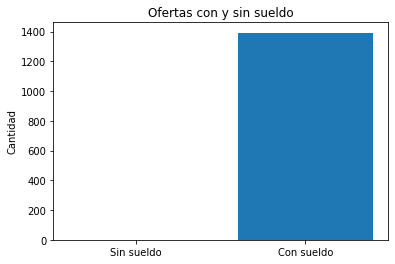

In [ ]:
import matplotlib.pyplot as plt

df_notnull = best_jobsUS_df[best_jobsUS_df['yearly_salary'].notnull()]
notnull_values = df_notnull.shape[0]
null_values = best_jobsUS_df.shape[0] - notnull_values

x = ["Sin sueldo", "Con sueldo"]
y = [null_values, notnull_values] 
plt.title("Ofertas con y sin sueldo")
plt.ylabel("Cantidad")
plt.bar(x, y)
plt.show()

Por otra parte, la distribución de los sueldos de los empleos que lo declaran tiene la siguiente forma. La distribución de sueldo se ve muy dispersa al ser gráficada con el sueldo estandarizado por año, por lo que se prefirio utilizar la estandarización en hora:

In [ ]:
salario=best_jobsUS_df['salary']

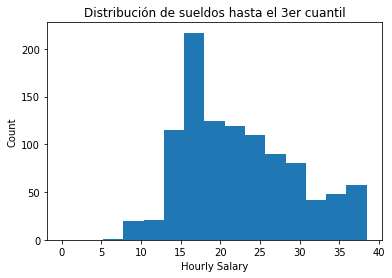

In [ ]:
quantil = np.quantile(df_notnull['hourly_salary'], 0.75)
plt.hist(df_notnull['hourly_salary'], bins = 15, range = (0.1, quantil))
plt.xlabel("Hourly Salary")
plt.ylabel("Count")
plt.title("Distribución de sueldos hasta el 3er cuantil")
plt.show()

## 2.4 Palabras más frecuentes en los atributos


In [ ]:

!pip install gensim

from gensim.parsing.preprocessing import remove_stopwords, strip_punctuation
from gensim import utils
import nltk

from collections import Counter

# Funcion que remueve stopwords y puntuaciones de las palabras dentro de un
# string presente en una lista L
def preprocess(L):
  new_text = []
  for text in list(L):
    word = remove_stopwords(text)
    new_text.append(strip_punctuation(word))
  return new_text

# Funcion que deja en minusculas todas las palabras dentro de un string presente
# en una lista L
def toLowerCase(L):
  lowered = []
  for i in list(L):
    for word in i:
      lowered.append(i.lower())
  return lowered

new_text = preprocess(best_jobsUS_df["title"])
lowered = toLowerCase(new_text)

# Funcion que contea las n palabras más frecuentes dentro de un atributo L
def count_words(L, n):
    words = []
    for text in list(L): 
        for word in str(text).split():
            words.append(word)

    counter_words = Counter(words)
    pairs = counter_words.most_common(n)
    return pairs

Se calcularon las palabras más frecuentes en los atributos title, description y skills para tener un panorama de qué palabras deben ser filtradas a lo largo de la exploración, pues no aportan con información a esta:

1500 palabras más utilizadas en title:

In [ ]:
# 1500 palabras más frecuentes el atributo title
words_title = count_words(toLowerCase(preprocess(best_jobsUS_df['title'])), 1500)
# Mostramos las primeras 25 para evitar extension
words_title[:25]

[('home', 8716),
 ('work', 7202),
 ('service', 6828),
 ('customer', 6774),
 ('representative', 5581),
 ('entry', 5277),
 ('assistant', 4709),
 ('sales', 4578),
 ('from', 3863),
 ('data', 3506),
 ('manager', 3293),
 ('time', 3002),
 ('clerk', 2938),
 ('remote', 2920),
 ('part', 2344),
 ('administrative', 2147),
 ('level', 2039),
 ('associate', 1896),
 ('technician', 1840),
 ('specialist', 1817),
 ('warehouse', 1372),
 ('project', 1344),
 ('shift', 1326),
 ('operator', 1294),
 ('internet', 1214)]

2500 palabras más utilizadas en description:

In [ ]:
# 2500 palabras más frecuentes el atributo description
words_title = count_words(toLowerCase(preprocess(best_jobsUS_df['description'])), 1500)
# Mostramos las primeras 25 para evitar extension
words_description[:25]

3000 palabras más utilizadas en skills:

In [ ]:
# 3000 palabras más frecuentes el atributo skills
words_skills = words_title = count_words(toLowerCase(preprocess(best_jobsUS_df['skills'])), 1500)
# Mostramos las primeras 25 para evitar extension
words_skills[:25]

Con un panorama claro sobre que palabras eliminar, se procede a crear una nueva función que nos muestre las palabras más frecuentes en cada atributo, con el filtro aplicado. Para esto, necesitaremos pasar estas listas a diccionarios, para hacer más eficiente la eliminacion de las ocurrencias:

In [ ]:
dt_title = dict(words_title)
dt_description = dict(words_description)
dt_skills = dict(words_skills)

In [ ]:

# Elimina la llave i del diccionario D
def count_words_clean(D):
  for i in filter:
    D.pop(i, None)
  return D
  

Ahora, podemos ver las palabras más frecuentes de mejor manera:

In [ ]:
most_frec_title = count_words_clean(dt_title)
titles = list(dt_title.items())
titles[:25]

In [ ]:
most_frec_desc = count_words_clean(dt_description)
desc = list(dt_description.items())
desc[:25]

In [ ]:
most_frec_skills = count_words_clean(dt_skills)
skills = list(dt_skills.items())
skills[:25]

Con esto, se grafican las 15 palabras más frecuentes de cada atributo:

* Gráfico de barras para el atributo *title*:

In [ ]:
plt.figure(figsize=(7,10))
plt.xlabel('Frecuencia')
plt.ylabel('Palabras')
x = [titles[i][0] for i in range(0,15)]
y = [titles[i][1] for i in range(0,15)]
g= plt.barh(x, y, color='orange')
plt.title('15 palabras más frecuentes en atributo "title"')
plt.show()

Con esto, se logra ver claramente que durante el año 2021 las ofertas laborales dominantes han sido en las áreas de venta, gerencia y almacenamiento/bodegaje. Esto, probablemente debido al aumento, o boom, del e-commerce durante la pandemía que, hasta la fecha, sigue en curso.

* Gráfico de barras para el atributo *description*:

In [ ]:
plt.figure(figsize=(7,10))
plt.xlabel('Frecuencia')
plt.ylabel('Palabras')
x = [desc[i][0] for i in range(0,15)]
y = [desc[i][1] for i in range(0,15)]
g= plt.barh(x, y, color='pink')
plt.title('15 palabras más frecuentes en atributo "description"')
plt.show()

Dentro de las descripciones de los trabajos, se ve un uso muy frecuente de la palabra experiencia, cliente y equipo.

* Gráfico de barras para el atributo *skills*:

In [ ]:
plt.figure(figsize=(7,10))
plt.xlabel('Frecuencia')
plt.ylabel('Palabras')
x = [skills[i][0] for i in range(0,15)]
y = [skills[i][1] for i in range(0,15)]
g= plt.barh(x, y, color='purple')
plt.title('15 palabras más frecuentes en atributo "skills"')
plt.show()

A pesar de verse una clara dominancia de la *skill* de administración, las ofertas tienen un gran interés también en la comunicación y planificación, habilidades muy ligadas con la organización.

## 2.5 Correlación entre variables


El objetivo de esta sección de exploración, es encontrar correlaciones entre la variable normalized (salarios normalizados) y otras variables de nuestro interés. Esto con el propósito de estudiar con qué variables se relaciona el salario y saber si coincide con las variables que se pensaron.

Lo primero que se quería observar, era si el largo (cantidad de palabras) de la descripción estaba relacionado con el salario, para esto se creó la variable "word_count" que contaba la cantidad de palabras que tenía la descripción.

In [ ]:
best_jobsUS_df["word_count"] = best_jobsUS_df["description"].str.split().str.len()

In [ ]:
best_jobsUS_df.sample(10)

Luego se creó un dataframe en donde estaban las variables del salario normalizado: "normalized" y la variable recién creada "word_count"

In [ ]:
df_corr = pd.DataFrame(best_jobsUS_df, columns=['normalized', 'word_count'])

In [ ]:
df_corr.sample(10)

Finalmente, se calculó el coeficiente de correlación entre ambas variables

In [ ]:
df_corr.corr()

De los resultados se puede apreciar que el valor obtenido es muy cercano a 0, esto quiere decir que ambas variables no están correlacionadas, por lo que el largo de la descripción no está relacionado con el salario.

Otras variables que eran de interés eran: locality (ciudad de donde es la oferta), title (título del cargo) y education (nivel de educación requerido). Por lo que se estudió la correlación en R para ver si efectivamente estas variables estaban relacionadas con el salario.

Para obtener los coeficientes de correlación, en R se utilizó el comando corRatio de la librería DiscriMiner, este comando permite calcular coeficientes de correlación entre una variable numérica con una categórica, con el siguiente código y arrojando los siguientes resultados:

### corRatio

corRatio(Best_Jobs\$normalized, Best_Jobs\$locality) \\
corRatio(Best_Jobs\$normalized, Best_Jobs\$title) \\
corRatio(Best_Jobs\$normalized, Best_Jobs\$education) 

0.2498862 \\
0.812064 \\
0.1029589

Del resultado se puede apreciar que las variables locality y education están poco correlacionadas con el salario, mientras que title está muy correlacionado. Por lo que se concluye que el salario tiene mucha relación con el título del cargo con el que se postea la oferta.

## 2.6 Exploración sobre grado de educación, regiones y horas


En esta sección se quiere obtener cuáles eran los requisitos de educación más recurrentes en las ofertas de trabajo, las ciudades/estados con más ofertas y a qué hora eran publicadas con más frecuencia.

### Educación requerida en ofertas de trabajo

In [ ]:
education = best_jobsUS_df['education'].value_counts(dropna=True).rename_axis('Education').reset_index(name='Count')
education

In [ ]:
#Nivel de educación más y menos pedidos en las ofertas de trabajo
min_max_education = education.head(1).append(education.tail(2))
min_max_education

In [ ]:
import matplotlib.pyplot as plt

plt.barh(education['Education'], education['Count'])
plt.xlabel('Cantidad')
plt.ylabel('Educación')
plt.title('Educación requerida en ofertas de trabajo')
plt.show()

### Cantidad de ofertas de trabajo por región

In [ ]:
region = best_jobsUS_df['region'].value_counts(dropna=True).rename_axis('Region').reset_index(name='Count')
region.head(15)

In [ ]:
#Región con mayor y menor cantidad de ofertas de trabajo
min_max_region = region.head(1).append(region.tail(1))
min_max_region

In [ ]:
import matplotlib.pyplot as plt

plt.bar(region['Region'], region['Count'])
plt.rcParams["figure.figsize"] = (20, 13)
plt.ylabel('Cantidad')
plt.xlabel('Región')
plt.title('Cantidad de ofertas de trabajo por ciudad/estado')
plt.show()

### Hora de publicación

In [ ]:
#Cantidad de ofertas publicadas según hora
best_jobsUS_df['posted_at'] = pd.to_datetime(best_jobsUS_df.posted_at, format='%d-%m-%Y %H:%M', errors='coerce')
hours = best_jobsUS_df['posted_at'].dt.hour.value_counts(dropna=True).rename_axis('Hour').reset_index(name='Count')
hours

In [ ]:
#Horas con mayor y menor número de publicaciones de ofertas de trabajo
hours_ordered = hours.sort_values(['Count'], ascending=False)
hours_ordered_table = hours_ordered.head(1).append(hours_ordered.tail(1))
hours_ordered_table

In [ ]:
import matplotlib.pyplot as plt

plt.bar(hours['Hour'], hours['Count'])
plt.xticks(list(hours['Hour']))
plt.ylabel('Cantidad')
plt.xlabel('Horas')
plt.title('Horas en que se publican las ofertas de trabajo')
plt.show()

## 2.7 Sueldos según la ubicación

Considerando que tenemos la información geográfica de cada oferta de trabajo, un análisis interesante que se puede hacer es en base al sueldo promedio que se registra en cada estado. 



#### Salario promedio en los Estados Unidos

In [ ]:
hour = best_jobsUS_df['hourly_salary'].mean()
print("El salario promedio/hora calculado es de: ", round(hour, 1), "USD")
year = best_jobsUS_df['yearly_salary'].mean()
print("El salario promedio/año calculado es de: ", round(year, 1), "USD")

En base a estos cálculos, el salario promedio anual es de 60908.3 USD, mientras el que el salario promedio por hora es de 29.3 USD.

Una vez obtenidos estos datos, pasamos al análisis de los sueldos, considerando el la ubicación geográfica de la oferta.

#### Salario promedio según el estado

En primer lugar, antes de calcular los valores promedio, calculamos cuantos datos de sueldos tenemos para cada estado. La idea es que se consideren solo aquellos estados que tengan la suficiente cantidad de datos para los promedios a mostrar. 


In [ ]:
jobs_salary = best_jobsUS_df[best_jobsUS_df['yearly_salary'].notnull()]
region_count = jobs_salary.groupby(['region']).size().reset_index(name='counts')
region_count['counts'].median()

Se obtiene que la mediana para la cantidad de valores por estado es de 29, por lo que para los siguientes análisis se considerarán solo los estados que tengan más de 16 valores de salarios.



In [ ]:
region_count_filtered = region_count.loc[region_count['counts'] >= 22]
best_jobs_filtered = best_jobsUS_df[best_jobsUS_df['region'].isin(list(region_count_filtered['region']))]
best_jobs_filtered = best_jobs_filtered[best_jobs_filtered['yearly_salary'].notnull()]

Una vez tenemos filtrados los datos, tanto las regiones con el conteo mínimo definido, como los salarios anuales no nulos, calculamos cual es el sueldo promedio anual por estado de USA.

In [ ]:
region_mean_salary = best_jobs_filtered.groupby('region', as_index=False)['yearly_salary'].mean()
region_mean_salary.sort_values(by=['yearly_salary'], ascending=False)

En base a este análisis, podemos observar que los 5 estados con mayor sueldo promedio anualmente son: 

- Massachusetts
- Colorado
- Tennnesee
- Michigan 
- Virginia

# 3. Preguntas y problemas

En base a la exploración y analísis de los datos, en conjunto con la motivación expresada, se plantean las siguientes preguntas a intentar resolver en este proyecto:

* ¿Se puede predecir el sueldo con las variables descripción de la oferta, ubicación del trabajo, área de interés, hora y skills? 

* Si tengo un conjunto de skills, ¿qué skill podría desarrollar para optar a un mejor sueldo?

* ¿Existe alguna relación entre la localización del trabajo y el rol que se está buscando en la oferta?

# 4. Contribuciones

* Maximiliano Jorquera: Estuvo a cargo de la introducción y la correlación entre variables.
* Catalina Rojas: Estuvo a cargo de la exploracion sobre grado de educación, regiones y horas.
* Loreto Palma: Estuvo a cargo del análisis de sueldos según la ubicación y de la normalización de los valores en el atributo salary.
* Gabriela Mora: Estuvo a cargo de la limpieza de datos y del apartado de atributos con mayor intéres.
* Bastián Pezoa: Estuvo a cargo del apartado de Estadísticas y palabras más frecuentes en los atributos.

Y entre todos, se discutieron las preguntas y problemas, y se redactó el presente informe.

# Hito 2


## 1. Mejoras Hito 1

Con respecto a las mejoras del Hito 1, 

Lo primero que se hizo fue cambiar la formulación de las preguntas, por lo que quedaron de la siguiente manera:

1.  ¿Se puede predecir el sueldo respecto a variables geográficas y aquellas extraídas de la oferta publicada?

2. Si tengo un conjunto de skills, ¿Qué skill podría desarrollar para optar a un mejor sueldo?

3. ¿Existen factores que permitan describir la oferta laboral y la localización del trabajo?

Analizando los datos disponibles y las preguntas que queríamos responder, no fue necesario incluir otro dataset

Para incluir los comentarios del equipo docente y de nuestros compañeros hicimos lo siguiente:

- En las variables de texto se utilizaron Stopword, para eliminar las palabras que no tenían significado por sí mismas y no aportaban al análisis. Se realizó solamente en esta variable porque se necesitaba para el procesamitno del modelo y responder la pregunta 1 (pregunta elegida para desarrollar), se espera hacer lo mismo para las variables necesarias para responder las siguientes preguntas en la próxima entrega.

- Se incluyó análisis de bigramas en la variable título del trabajo (title), con el objetivo de hacer los análisis necesarios para la pregunta 1, se espera que para las siguientes preguntas se haga un análisis similar paera poder responderlas con la información que más agrega valor. El desarrollo de esta sección se encuentra en los resultados preliminares de la pregunta 1. 

- Se creó una nueva columna _hourly_salary_ con los salarios normalizados por hora, esta vez considerando una diferencia entre los trabajos _full time_ y _part time_.

## 2. Propuesta metodológica experimental inicial:

### Pregunta 1

1. ¿Se puede predecir el sueldo respecto a variables geográficas y aquellas extraídas de la oferta publicada?

En el dataset existen muchas variables de texto que en el estudio se consideran relevantes para la predicción de los sueldos, por lo que se hará una limpieza y preprocesamiento de estos datos. Para realizarlo se usaron stopwords, luego se removieron todas las puntuaciones y por último y por último, se pusieron en minúscula las palabras con la finalidad de un óptimo procesamiento al aplicar NLP. Esto fue con el objetivo de poder hacer clustering en la variable **title job** para ver si había una agrupación natural para luego clasificar a mano los datos. En principio se etiquetarán 300. 

El proceso de clustering que se siguió consiste en iniciar un vectorizador de la frecuencia del documento de frecuencia inversa (tf-idf) que luego se usó para convertir el vector del título de las descripciones en una matriz tf-idf.
Para obtener la matriz Tf-idf, se cuentan las apariciones de palabras que hay en el vector que contiene los títulos de las publicaciones.  Esto también se llama matriz de frecuencia de términos. La forma en que se rellena la matriz consiste en ponderar la frecuencia de de las palabras en el vector con frecuencia inversa, o sea, las palabras que aparecen con frecuencia dentro de un string, pero no con frecuencia dentro del corpus reciben una ponderación más alta ya que se supone que estas palabras contienen más significado en relación al string de la tupla. En esta parte se probaran unigramas y bigramas para ver cuál de sos 2 enfoques agrupa de manera más coherentes los datos, y para finalizar, para la evaluación de ellos utilizaremos el enfoque visual así como también la estimación de métricas tales como cohesión y separación.

Con respecto a las variables numéricas que se consideran relevantes para el estudio, se decide normalizar la variable de salario, ya que antes no considerábamos que habían salarios para trabajos part time y full time, una vez normalizados, se eliminarán los outliers. Además, se crearán nuevas variables que ayudarán a segmentar la variable de horas.

Para la predicción se decide usar modelos de machine learning de clasificación, el cual predeciría el intervalo de sueldo en que se encontraría la oferta de trabajo. Para realizar el modelo de clasificación, se usan los sectores de trabajo definidos por los clusters, bloque horario en que se publicó la oferta y por último, la ubicación geográfica del trabajo.

Y por último, para evaluar la calidad de la clasificación compararemos diversos algoritmos, utilizaremos métricas como F1, precision y recall, aplicando k-fold cross validation o un particionado de 70-30 para entrenamiento y testeo respectivamente. Además de probar el modelo con over y under sampling, con distintas variables.


### Pregunta 2

Si tengo un conjunto de skills, ¿Qué skill podría desarrollar para optar a un mejor sueldo?

Limpiaremos el dataset dejando solo 2 atributos: Skills y Normalized (variable normalizada que indica el sueldo).

Filtraremos los resultados dejando solo las instancias que tienen el atributo normalized mayor a 0, ya que así podremos trabajar con las skills que nos aporten información en relación al sueldo.

Aplicaremos técnicas de clustering para encontrar de manera natural si las características de nuestro dataset son suficientes para encontrar grupos de skills similares teniendo en cuenta su sueldo.

Probaremos combinaciones en el número de clúster y distintos enfoques de clustering, realizando clustering jerárquico aglomerativo y Kmeans.

Para evaluar los clusters, utilizaremos el enfoque visual así como también la estimación de métricas tales como el coeficiente de Sillhouete.


### Pregunta 3

¿Se pueden inferir alguna relación entre la población, la región, el PIB y el tipo de trabajo que se está ofertando?


En el dataset, agruparemos los nombres de los trabajos en categorías, por lo que se creará una nueva variable para categorizar y agrupar los trabajos, además se añadirán otros datos, que aporten características de cada localidad, para ver si hay alguna correlación con la cantidad de habitantes, ingreso per cápita, etc. Por último, nos enfocaremos en hacer clustering usando estas nuevas variables, y viendo si podemos encontrar alguna relación entre estas.

En particular, se agregó una columna para el tipo de trabajo, utilizando 4 áreas para englobar cada oferta de trabajo:
* Servicios.
* Ventas.
* Ingeniería.
* Salud.

Usando el método del codo, buscamos cuantos clusters forman nuestros datos, usando la oferta, región. Por último, se analizan los clusters obtenidos.


## 3. Resultado preliminar Pregunta 1

### Mejora Normalización Hito 1

En esta sección se hizo el análisis para definir cuales sería las clases para la variable 'salary', así como también normalizar los valores ee esta variable, mejorando la normalización usada en el Hito 1.

In [ ]:
#standard import form used
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
best_jobs = pd.read_csv("/Best_Jobs.csv", sep=';', engine='python', error_bad_lines=False) 
best_jobs.drop(best_jobs.iloc[:, 20:166], inplace = True, axis = 1)
best_jobs.head()

FileNotFoundError: ignored

Se lee la base de datos a la cual se le ha añadido información sobre el tiempo de la publicación de la oferta. Se hizo una pequeña exploración de los datos para ver cuántas filas se tiene, los tipos de trabajo que se ofrecen en 'employment_type' y el tipo de dato de cada columna.

In [ ]:
best_jobs=best_jobsUS_df
best_jobs.shape

(1392, 24)

In [ ]:
interns = best_jobs['employment_type']=='INTERN'
intern_filter = best_jobs[interns]
intern_filter

,Unnamed: 0,salary,wage_type,education,crawled_at,description,title,skills,country,locality,posted_at,hora,segmento_hora,bloque_horario,region,experience,employment_type,company,str_salary,reported_salary,normalized,hourly_salary,salary_class,yearly_salary
145,1329,17.0,hour,2 Year Degree,05-05-2021 3:07,Vaco Indianapolis is looking for a results dri...,Recruiting Sourcer Intern - Flexible Hours,"Reports, Search (Computer Science), Recruitmen...",US,Indianapolis,05-04-2021,6:00:00,6 am,ma�ana,IN,No experience required.,INTERN,Vaco Staffing,False,17.0,35360.0,17.0,2,35360.0


In [ ]:
employment = best_jobs['employment_type']
dtypes_b =  best_jobs.dtypes
print(dtypes_b)

Unnamed: 0           int64
salary             float64
wage_type           object
education           object
crawled_at          object
description         object
title               object
skills              object
country             object
locality            object
posted_at           object
hora                object
segmento_hora       object
bloque_horario      object
region              object
experience          object
employment_type     object
company             object
str_salary            bool
reported_salary    float64
normalized         float64
hourly_salary      float64
salary_class         int64
yearly_salary      float64
dtype: object


Se crea una función para generar una columna que nos entregue el salario por hora de cada oferta de trabajo. Se consideraron 40 horas de trabajo a la semana para ofertas de tipo "Full Time" y 20 horas de trabajo a la semana para ofertas tipo "Part Time". 

In [ ]:
def salary_to_hourly(salary, wage_type, employment_type):
  """
  Convierte los sueldos a un valor de sueldo por hora.
  """
  weekly_hours = 40
  if "FULL_TIME, PART_TIME" in str(employment_type): 
    if float(salary) > 400:
      weekly_hours = 40
    else: 
      weekly_hours = 20
  elif "PART_TIME" in str(employment_type):
    weekly_hours = 20

  if "year" in str(wage_type).lower():
    return float(salary)/(weekly_hours*52)
  elif ("not_reported" not in str(wage_type).lower()) and ("hour" in str(wage_type).lower() or "hr" in str(wage_type).lower()):
    return float(salary)
  elif "week" in str(wage_type).lower():
    return float(salary)/weekly_hours
    

In [ ]:
best_jobs['hourly_salary'] = best_jobs.apply(lambda x: 
                                                   salary_to_hourly(salary=x['reported_salary'], wage_type=x['wage_type'], employment_type=x['employment_type']), axis=1)

best_jobs.shape

(1392, 24)

### Selección de clases para el entrenamiento 

Se filtran los datos que tengan un salario menor al mínimo establecido en los Estados Unidos, además de filtrar los valores que no tengan un salario reportado

In [ ]:
best_jobs = best_jobs.drop(best_jobs[(best_jobs.hourly_salary < 7.25) | (best_jobs.hourly_salary.isnull())].index)
best_jobs.shape

(1392, 24)

Separamos los valores de los sueldos en rangos. Usaremos los datos hasta el 95% de los datos (cuantil 0.95) para descartar datos demasiado grandes. Se aplican distintos valores de *bins* para escoger en cuál quedan mejor distribuídos. Se escoge el de *bins=9*. 

62.5


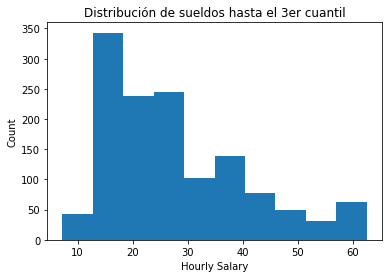

In [ ]:
quantil = np.quantile(best_jobs['hourly_salary'], 0.95)
print(quantil)
plt.hist(best_jobs['hourly_salary'], bins = 10, range = (7.25, quantil))
plt.xlabel("Hourly Salary")
plt.ylabel("Count")
plt.title("Distribución de sueldos hasta el 3er cuantil")
plt.show()

In [ ]:
quantil = np.quantile(best_jobs['hourly_salary'], 0.95)
print(quantil)

plt.hist(best_jobs['hourly_salary'], bins = 15, range = (7.25, quantil))
plt.xlabel("Hourly Salary")
plt.ylabel("Count")
plt.title("Distribución de sueldos hasta el 3er cuantil")
plt.show()

In [ ]:
quantil = np.quantile(best_jobs['hourly_salary'], 0.95)
print(quantil)

plt.hist(best_jobs['hourly_salary'], bins = 9, range = (7.25, quantil))
plt.xlabel("Hourly Salary")
plt.ylabel("Count")
plt.title("Distribución de sueldos hasta el 3er cuantil")
plt.show()

In [ ]:
best_jobs = best_jobs.drop(best_jobs[(best_jobs.title.isnull()) | (best_jobs.region.isnull())].index)
best_jobs = best_jobs.drop(best_jobs[(best_jobs.hourly_salary > quantil)].index)


Se convierten los valores que se tienen de sueldos a un sueldo por hora.

In [ ]:
def salary_classes(hourly_salary, min, max):
  """
  Convierte los sueldos a un valor de sueldo por hora.
  """
  limits = np.linspace(min, max, num=10)

  if (hourly_salary > limits[0]) & (hourly_salary <= limits[1]):
    return 1
  elif (hourly_salary > limits[1]) & (hourly_salary <= limits[2]):
    return 2
  elif (hourly_salary > limits[2]) & (hourly_salary <= limits[3]):
    return 3
  elif (hourly_salary > limits[3]) & (hourly_salary <= limits[4]):
    return 4
  elif (hourly_salary > limits[4]) & (hourly_salary <= limits[5]):
    return 5
  elif (hourly_salary > limits[5]) & (hourly_salary <= limits[6]):
    return 6
  elif (hourly_salary > limits[6]) & (hourly_salary <= limits[7]):
    return 7
  elif (hourly_salary > limits[7]) & (hourly_salary <= limits[8]):
    return 8
  elif (hourly_salary > limits[8]) & (hourly_salary <= limits[9]):
    return 9

best_jobs['salary_class'] = best_jobs.apply(lambda x: 
                                                   salary_classes(hourly_salary=x['hourly_salary'], min=7.25, max=best_jobs.hourly_salary.max()), axis=1)

### Procesamiento de variables - Mejora Hito 1 (stopword)

In [ ]:
#código stopword
#standard import form used
import pandas as pd 
import numpy as np
from gensim.parsing.preprocessing import remove_stopwords, preprocess_string, strip_punctuation
import sys


In [ ]:
# Removemos las stopwords del texto. Stopwords son palabras que no tienen un sentido por si solas.
# Normalmente son un grupo de articulos, pronombres, preposiciones, adverbios, entre otros.
# Gensim tiene esta funcion con una base de stopwords ya creada, simplemente llamamos a la funcion.

best_jobsUS_df = best_jobs

a=best_jobsUS_df['title']
b=[]

for i in a:
  b.append(remove_stopwords(i))

e = best_jobsUS_df['skills'].astype(str)
f=[]

for i in e:
  f.append(remove_stopwords(i))

i = best_jobsUS_df['description'].astype(str)
j = []

for k in i:
  j.append(remove_stopwords(k))

In [ ]:
# Removemos la puntuacion de las palabras
c=[]
for i in b:
  c.append(strip_punctuation(i))

g = []

for i in f:
  g.append(strip_punctuation(i))

k=[]

for i in j:
  k.append(strip_punctuation(i))

In [ ]:
# Transformamos todas las palabas a minusculas
import nltk

d=[]
for i in c:
  d.append(i.lower())

h =[]

for i in g:
  h.append(i.lower())


  
l = []
for i in k:
  l.append(i.lower())

In [ ]:
# Ahora, buscamos acortar la palabra a solo su palabra raiz, para ello utilizamos
# la funcion snowballStemmer de la libreria NLTK la cual nos permitirá crear
# un pequeño algoritmo que realice este trabajo. Solo necesitamos pasarle el
# idioma en el que esta el texto.

from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

import re
import os
import codecs
from sklearn import feature_extraction


# Creamos 2 algortimos. Uno que tokeniza y corta la palabras a su raiz, y otro que
# simplemente tokeniza las palabras.

# Tokenizar es romper el texto en las palabras que lo componen.

def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token) # Agregamos los tokens a la lista
    stems = [stemmer.stem(t) for t in filtered_tokens] # Cortamos a la raiz el token
    return stems # retornamos la lista de palabras tokenizadas y cortadas


def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token): # Filtramos los que sean numeros o puntuaciones
            filtered_tokens.append(token) # Agregamos los tokens a la lista
    return filtered_tokens # Retornamos la lista de tokens

nltk.download('punkt')

# Creamos dos vocabularios uno cortado a raiz y otro simplemente tokenizado

totalvocab_stemmed_title = [] # Cortado a la raiz
totalvocab_tokenized_title = [] # Tokenizado solamente

# Iteramos sobre la lista con las palabras en minusculas
for i in d: # i: Titulo en minusculas
  allwords_stemmed = tokenize_and_stem(i) # Cortamos y tokenizamos a la raiz
  totalvocab_stemmed_title.extend(allwords_stemmed) # Añadimos todas las palabras al vocabulario
    
  allwords_tokenized = tokenize_only(i) # Simplemente tokenizamos
  totalvocab_tokenized_title.extend(allwords_tokenized) # Agregamos las palabras al vocabulario


totalvocab_stemmed_skills = []
totalvocab_tokenized_skills = []

for i in h:
  allwords_stemmed = tokenize_and_stem(i)
  totalvocab_stemmed_skills.extend(allwords_stemmed)

  allwords_tokenized = tokenize_only(i)
  totalvocab_tokenized_skills.extend(allwords_tokenized)

totalvocab_stemmed_desc = []
totalvocab_tokenized_desc = []

for i in l:
  allwords_stemmed = tokenize_and_stem(i)
  totalvocab_stemmed_desc.extend(allwords_stemmed)

  allwords_tokenized = tokenize_only(i)
  totalvocab_tokenized_desc.extend(allwords_tokenized)

# Creamos un dataframe con las palabras tokenizadas, utilizando la raiz como indice
# Sirve para tener una manera facil de ver una raiz y transformarlo a una palabra

vocab_frame = pd.DataFrame({'words': totalvocab_tokenized_title}, index = totalvocab_stemmed_title)
print('there are ' + str(vocab_frame.shape[0]) + ' items in vocab_frame')

vocab_frame_skills = pd.DataFrame({'words': totalvocab_tokenized_skills}, index=totalvocab_stemmed_skills)
print('there are ' + str(vocab_frame_skills.shape[0]) + ' items in vocab_frame_skills')

vocab_frame_desc = pd.DataFrame({'words': totalvocab_tokenized_desc}, index=totalvocab_stemmed_desc)
print('there are ' + str(vocab_frame_desc.shape[0]) + ' items in vocab_frame_desc')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
there are 4908 items in vocab_frame
there are 20154 items in vocab_frame_skills
there are 280795 items in vocab_frame_desc


In [ ]:
vocab_frame.terms

AttributeError: ignored

### Clusters

In [ ]:
# Ahora, creamos una matriz tf-idf (term frequency-inverse document frequency)
# Para obtenerla, primero contamos las frecuencias de las palabras en el documento. Esto se 
# transforma en una matriz de documentos y terminos (DTM), tambien llamada matriz  
# de frecuencia de termino.

# Para ello, primero definimos el vectorizador que realizará el trabajo de
# generar la matriz

from sklearn.feature_extraction.text import TfidfVectorizer

#define vectorizer parameters
# max_df: Porcentaje maximo de presencia del termino en el documento (Debe tener como maximo un 80%, si es mayor a esto, probablemente la palabra no tiene mucho sentido)
# min_df: Porcentaje minimo de presencia del termino en el documento
# ngram_range: N-grama a buscar (Unigrama, bigrama, trigrama, etc...)

# Contando solo unigramas
tfidf_vectorizer_unigram = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 min_df=0.01, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_only, ngram_range=(1,1))

# Contando solo bigramas
tfidf_vectorizer_bigram = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 min_df=0.01, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_only, ngram_range=(2,2))

# Creamos la matriz sobre la lista con las palabras en minusculas
%time tfidf_matrix_unigram = tfidf_vectorizer_unigram.fit_transform(best_jobsUS_df['title'])

%time tfidf_matrix_bigram = tfidf_vectorizer_bigram.fit_transform(best_jobsUS_df['title'])

print(tfidf_matrix_unigram.shape, tfidf_matrix_bigram.shape)

CPU times: user 232 ms, sys: 463 µs, total: 232 ms
Wall time: 233 ms
CPU times: user 239 ms, sys: 730 µs, total: 240 ms
Wall time: 239 ms
(1331, 66) (1331, 28)


In [ ]:
# Lista de features usadas en la matriz tf-idf

terms = tfidf_vectorizer_unigram.get_feature_names()
terms2 = tfidf_vectorizer_bigram.get_feature_names()
print(terms)
print(terms2)

['2nd', 'account', 'accountant', 'accounts', 'administrative', 'administrator', 'agent', 'analyst', 'assembler', 'assistant', 'associate', 'bookkeeper', 'business', 'clerk', 'coordinator', 'customer', 'data', 'driver', 'engineer', 'entry', 'general', 'hire', 'hiring', 'home', 'home-based', 'immediate', 'insurance', 'internet', 'jobs', 'level', 'machine', 'maintenance', 'manager', 'manufacturing', 'marketing', 'media', 'medical', 'merchandiser', 'nurse', 'office', 'online', 'operations', 'operator', 'part-time', 'payable', 'payroll', 'production', 'project', 'receivable', 'remote', 'representative', 'retail', 'sales', 'senior', 'service', 'shift', 'specialist', 'sr.', 'staff', 'supervisor', 'support', 'survey', 'technician', 'time', 'warehouse', 'work']
['2nd shift', 'accounts payable', 'accounts receivable', 'administrative assistant', 'assistant work', 'customer service', 'data entry', 'entry clerk', 'entry level', 'home customer', 'home data', 'home-based work', 'internet customer', 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# Las distancias de la matriz medidas con similitud de coseno
from sklearn.metrics.pairwise import cosine_similarity

dist = 1 - cosine_similarity(tfidf_matrix_unigram)
dist2 = 1-cosine_similarity(tfidf_matrix_bigram)
print(dist, '\n')
print('\n')
print(dist2)

[[ 0.00000000e+00  3.49302798e-01  5.19961508e-01 ...  1.00000000e+00
   1.00000000e+00  1.00000000e+00]
 [ 3.49302798e-01 -2.22044605e-16  4.58894625e-01 ...  1.00000000e+00
   1.00000000e+00  1.00000000e+00]
 [ 5.19961508e-01  4.58894625e-01 -2.22044605e-16 ...  1.00000000e+00
   1.00000000e+00  1.00000000e+00]
 ...
 [ 1.00000000e+00  1.00000000e+00  1.00000000e+00 ... -2.22044605e-16
   1.00000000e+00  1.00000000e+00]
 [ 1.00000000e+00  1.00000000e+00  1.00000000e+00 ...  1.00000000e+00
   1.00000000e+00  1.00000000e+00]
 [ 1.00000000e+00  1.00000000e+00  1.00000000e+00 ...  1.00000000e+00
   1.00000000e+00  0.00000000e+00]] 



[[ 0.00000000e+00  0.00000000e+00  6.20460956e-01 ...  1.00000000e+00
   1.00000000e+00  1.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  6.20460956e-01 ...  1.00000000e+00
   1.00000000e+00  1.00000000e+00]
 [ 6.20460956e-01  6.20460956e-01 -2.22044605e-16 ...  1.00000000e+00
   1.00000000e+00  1.00000000e+00]
 ...
 [ 1.00000000e+00  1.00000000e+00  1.000

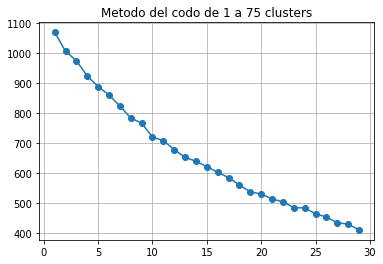

In [ ]:
# Ahora, haremos un metodo del codo para elegir el numero de clusters a correr
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Metodo del codo para unigramas
sse1 = []

clusters = list(range(1, 30))
for k in clusters:
    kmeans = KMeans(n_clusters=k).fit(tfidf_matrix_unigram)
    sse1.append(kmeans.inertia_)

plt.plot(clusters, sse1, marker="o")
plt.title("Metodo del codo de 1 a 75 clusters")
plt.grid(True)
plt.show()

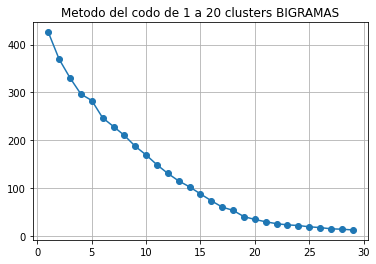

In [ ]:
# Metodo del codo para bigramas
sse2 = []

clusters = list(range(1, 30))
for k in clusters:
    kmeans = KMeans(n_clusters=k).fit(tfidf_matrix_bigram)
    sse2.append(kmeans.inertia_)

plt.plot(clusters, sse2, marker="o")
plt.title("Metodo del codo de 1 a 20 clusters BIGRAMAS")
plt.grid(True)
plt.show()

Podemos notar que después de 25 el SSE de decrece muy poco, por lo que nos quedaremos con K=25

In [ ]:
# Ahora, reducimos la dimensionalidad de los datos para poder graficar el clustering
from sklearn.decomposition import TruncatedSVD

# Usaremos Singular-Value Decomposition que es una tecnica de reduccion de dimension
# para matrices que normalmente se utiliza en matrices de conteo de 
# terminos / tf-idf. En este ambito, este proceso es conocido como 
# Latent Semantic Analysis (LSA).

# Utilizamos TruncatedSVD 

new_X1 = TruncatedSVD(n_components=2).fit_transform(tfidf_matrix_unigram) # reduccion con unigramas
new_X2 = TruncatedSVD(n_components=2).fit_transform(tfidf_matrix_bigram) # reduccion con bigramas

# Generamos el cluster y vemos los labels de la data
kmean1 = KMeans(n_clusters=50).fit(new_X1) # kmeans con Unigramas
kmean2 = KMeans(n_clusters=50).fit(new_X2) # kmeans con bigramas

print("Numero total de datos: " + str(kmean1.labels_.size))
print("Labels del cluster: " + '\n')
print(kmean1.labels_, '\n')

print("Numero total de datos: " + str(kmean2.labels_.size))
print("Labels del cluster: " + '\n')
print(kmean2.labels_, '\n')
kmean1.labels_

Numero total de datos: 1331
Labels del cluster: 

[21  8 38 ... 31 24 19] 

Numero total de datos: 1331
Labels del cluster: 

[15 15  2 ...  9  0  0] 



array([21,  8, 38, ..., 31, 24, 19], dtype=int32)

In [ ]:
import joblib



clusters = kmean1.labels_.tolist()
kk=pd.DataFrame(clusters)

In [ ]:
listas = { 'd': d, 'clusters': clusters}

frame = pd.DataFrame(listas, index = [clusters] , columns = ['d', 'clusters'])
frame

,d,clusters
21,work from home data entry jobs part time remote,21
8,work home data entry,8
38,administrative assistant data entry clerk r...,38
44,teacher english online groups,44
6,customer service representative,6
...,...,...
8,work home data entry clerk part time,8
24,sdet ii donotapply,24
31,sales customer service call center rep,31
24,cnc lathe machinist,24


In [ ]:
from __future__ import print_function

print("Titles per cluster:")
print()
#sort cluster centers by proximity to centroid
order_centroids = kmean1.cluster_centers_.argsort()[:, ::-1] 

for i in range(num_clusters):
  
    print("Cluster %d titles:" % i, end='')
    for title in frame.loc[i]['d'].values.tolist():
        print(' %s,' % title, end='')
    print() #add whitespace
    print() #add whitespace
    
print()
print()

Titles per cluster:

Cluster 0 titles: tow motor operator, quality control document coordinator, accountant iii, temp hire forklift operator, machine operator   utility worker, registered nurse, operations assembly worker, machine operator, 1st shift assembly   glass, inspector   2nd shift, steam plant operator, registered nurse   covid drive thru testing rn, 1st shift manufacturing, machine operator, production operator, 3rd shift assembler  start asap  no exp  required, provider relations coordinator, senior accountant, sr  accountant, payroll administrator, staff accountant, sr  accountant, sr  staff accountant, senior staff accountant, bookkeeper, staff accountant, hr bilingual coordinator, staff accountant, staff accountant, patient care coordinator, staff accountant, senior accountant, payroll administrator, front desk coordinator, operations personnel administrator, sr  accountant, payroll administrator, sr  accountant, senior accountant, staff accountant, sr  accountant, staff 

In [ ]:
# Graficamos el cluster par unigrasmas

plt.scatter(new_X1[:, 0], new_X1[:, 1], c=kmean1.labels_)
plt.title("K-Means, K=17, UNIGRAMAS")
plt.show()

Cantidad de datos por cluster:

In [ ]:
# Creamos diccionarios para guardar los valores del modo (cluster: # de repeticiones)
val_kmeans = {}

for i in kmean1.labels_:
    val_kmeans[i] = np.count_nonzero(kmean1.labels_ == i)

print('Con reduccion de dimension: \n')
for v in val_kmeans:
    print('Cluster:', v, 'contiene: ', val_kmeans[v], " elementos")

Ahora graficamos Kmeans con los bigramas, utilizano K=17:

In [ ]:
# Graficamos el cluster

plt.scatter(new_X2[:, 0], new_X2[:, 1], c=kmean2.labels_)
plt.title("K-Means para bigramas con K=17")
plt.show()

Cantidad de datos por cluster:

In [ ]:
# Creamos diccionarios para guardar los valores del modo (cluster: # de repeticiones)
val_kmeans2 = {}

for i in kmean2.labels_:
    val_kmeans2[i] = np.count_nonzero(kmean2.labels_ == i)

print('Con reduccion de dimension: \n')
for v in val_kmeans2:
    print('Cluster:', v, 'contiene: ', val_kmeans2[v], " elementos")

Realizamos ahora un analisis utilizando el algoritmo de DBSCAN para realizar nuestros clusters:

In [ ]:
from sklearn.neighbors import NearestNeighbors

nbrs = NearestNeighbors(n_neighbors=3).fit(tfidf_matrix_unigram)
distances, indices = nbrs.kneighbors(tfidf_matrix_unigram)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.axhline(y=0.01, color='r', linestyle='--') #Ajuste el valor para "y" en esta línea
plt.plot(distances)
from sklearn.cluster import DBSCAN
eps = 0.01
min_samples = 5

dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit(tfidf_matrix_unigram)

In [ ]:
plt.scatter(new_X1[:, 0], new_X1[:, 1], c=dbscan.labels_)
plt.title("Clusterizacion con DBSCAN")
plt.show()

Para validar la asignacion del cluster ocuparemos el coeficiente de Silhouette. A continuacion, calcularemos el coeficiente y lo graficaremos:

In [ ]:
from sklearn.metrics import silhouette_score, silhouette_samples

# Utilizamos el codigo adjunto en el tutorial 3 del ramo para graficar:

def plot_silhouette(dataset, model, ax1=None, ax2=None):
    use_indices = model.labels_ >= 0
    use_labels = model.labels_[use_indices]
    use_data = dataset[use_indices]

    n_clusters = len(np.unique(use_labels))

    if ax1 is None or ax2 is None:
        fig, (ax1, ax2) = plt.subplots(1, 2)

    silhouette_avg = silhouette_score(use_data, use_labels)
    print(f"The average silhouette_score for {model.__class__.__name__} is : {silhouette_avg}")
    sample_silhouette_values = silhouette_samples(use_data, use_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[use_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                            0, ith_cluster_silhouette_values, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax1.set_title(f"{model.__class__.__name__}")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])

    ax2.scatter(use_data[:, 0], use_data[:, 1], c=use_labels)

def plot_multiple(dataset, models):
    n_models = len(models)
    
    fig, axs = plt.subplots(n_models, 2, figsize=(10, 5 * n_models))

    for i, (ax1, ax2) in enumerate(axs):
        plot_silhouette(dataset, models[i], ax1=ax1, ax2=ax2)

plot_multiple(new_X1, [kmean1, dbscan])

En conclusión y a modo de resumen:

Del análisis, elegimos quedarnos con KNN ya que tiene mejores métricas, nos guiamos principalmente por el coeficiente de silhouette. Además que con KNN encontramos el parámetro EPS óptimo.

El parámetro de KNN lo elegimos con el método del codo, que es de un K = 160

### Entrenamiento

Aquí se sube el nuevo data set con los datos etiquetados

In [ ]:
title_clusters = pd.read_csv("/content/sample_data/best_jobs_300.csv", sep=';', engine='python', error_bad_lines=False) 
title_clusters.head()

,Unnamed: 0,salary,wage_type,education,crawled_at,description,title,skills,country,locality,posted_at,hora,segmento_hora,bloque_horario,region,experience,employment_type,company,str_salary,reported_salary,normalized,hourly_salary,salary_class,area_trabajo
0,3192,19.00,hour,NaN,05-05-2021 3:18,The Machine Operator is responsible for proper...,2nd Shift Experienced Machine Operator - Hayss...,"Food Safety, Good Manufacturing Practices, Pro...",US,York,05-04-2021,11:04:00,11:00 a.�m.,ma�ana,PA,At least 1 year experience.,FULL_TIME,Bickel's Snack Foods Inc,False,19.00,39520.0,19.000000,2,servicios
1,2557,25000.00,year,NaN,05-05-2021 3:08,"This is a Direct Hire Opportunity, and job dut...","2nd Shift Lead Compounder, Batch Maker Blender...","Storage (Warehousing), Packaging And Labeling",US,Palatine,29-04-2021,9:06:00,9:00 a.�m.,ma�ana,IL,At least 3 years experience.,FULL_TIME,Manpower,False,25000.00,25000.0,12.019231,1,servicios
2,3592,66.00,hour,NaN,05-05-2021 3:08,Ref ID: 04835 [ Phone number blocked ] Classif...,3D CAD Design QA Engineer,"Computer-Aided Design, Self Motivation, Attent...",US,Leesburg,18-04-2021,12:26:00,12:00 p.�m.,tarde,VA,At least 2 years experience.,TEMPORARY,Robert Half,False,66.00,137280.0,66.000000,9,Ingenieria
3,3358,35.86,hour,High School,05-05-2021 3:16,Paladin Consulting is currently hiring a 3rd S...,"3rd Shift HVAC Engineer (Frederick, CO)","Scheduling, Carpentry, HVAC, Chlorofluorocarbo...",US,Frederick,06-04-2021,11:41:00,11:00 a.�m.,ma�ana,CO,At least 7 years experience.,"FULL_TIME, PART_TIME","Paladin Consulting, Inc",False,35.86,74588.8,35.860000,4,Ingenieria
4,1205,18.00,hour,High School,05-05-2021 3:24,Vaco's accounting and finance team is made up ...,A/R Medical Billing/Collections,"Collections, Accounting, Finance, Accounts Rec...",US,Sharonville,13-04-2021,5:40:00,5:00 a.�m.,madrugada,OH,3 to 10 years experience.,FULL_TIME,Vaco Staffing,False,18.00,37440.0,18.000000,2,salud


#### Modificaciones

En primer lugar se crean las clases númericas para los datos que queremos utilizar para el entrenamiento. En este caso, queremos predecir "salary_class", que nos indica un rango de salario. Se entrenarán modelos para hacer la clasificación a partir de los siguientes datos: 

- Región (estado en el caso de US).
- Bloque horario.
- Título, usando los clusters obtenidos anteriormente.

En primer lugar, generamos las clases numéricas para los datos de "region" y de "bloque_horario".

In [ ]:
title_clusters['hour_class']=title_clusters['bloque_horario'].map({'ma�ana':0,'tarde':1,'noche':2,'madrugada':3})

In [ ]:
title_clusters['region_class'] = np.unique(title_clusters['region'], return_inverse=True)

In [ ]:
title_clusters['area_trabajo_class'] =title_clusters['area_trabajo'].map({'servicios':0,'salud':1,'Ingenieria':2,'Ventas y Negocios':3})

In [ ]:
title_clusters.head()

,Unnamed: 0,salary,wage_type,education,crawled_at,description,title,skills,country,locality,posted_at,hora,segmento_hora,bloque_horario,region,experience,employment_type,company,str_salary,reported_salary,normalized,hourly_salary,salary_class,area_trabajo,hour_class,region_class,area_trabajo_class
0,3192,19.00,hour,NaN,05-05-2021 3:18,The Machine Operator is responsible for proper...,2nd Shift Experienced Machine Operator - Hayss...,"Food Safety, Good Manufacturing Practices, Pro...",US,York,05-04-2021,11:04:00,11:00 a.�m.,ma�ana,PA,At least 1 year experience.,FULL_TIME,Bickel's Snack Foods Inc,False,19.00,39520.0,19.000000,2,servicios,0,29,0
1,2557,25000.00,year,NaN,05-05-2021 3:08,"This is a Direct Hire Opportunity, and job dut...","2nd Shift Lead Compounder, Batch Maker Blender...","Storage (Warehousing), Packaging And Labeling",US,Palatine,29-04-2021,9:06:00,9:00 a.�m.,ma�ana,IL,At least 3 years experience.,FULL_TIME,Manpower,False,25000.00,25000.0,12.019231,1,servicios,0,9,0
2,3592,66.00,hour,NaN,05-05-2021 3:08,Ref ID: 04835 [ Phone number blocked ] Classif...,3D CAD Design QA Engineer,"Computer-Aided Design, Self Motivation, Attent...",US,Leesburg,18-04-2021,12:26:00,12:00 p.�m.,tarde,VA,At least 2 years experience.,TEMPORARY,Robert Half,False,66.00,137280.0,66.000000,9,Ingenieria,1,34,2
3,3358,35.86,hour,High School,05-05-2021 3:16,Paladin Consulting is currently hiring a 3rd S...,"3rd Shift HVAC Engineer (Frederick, CO)","Scheduling, Carpentry, HVAC, Chlorofluorocarbo...",US,Frederick,06-04-2021,11:41:00,11:00 a.�m.,ma�ana,CO,At least 7 years experience.,"FULL_TIME, PART_TIME","Paladin Consulting, Inc",False,35.86,74588.8,35.860000,4,Ingenieria,0,4,2
4,1205,18.00,hour,High School,05-05-2021 3:24,Vaco's accounting and finance team is made up ...,A/R Medical Billing/Collections,"Collections, Accounting, Finance, Accounts Rec...",US,Sharonville,13-04-2021,5:40:00,5:00 a.�m.,madrugada,OH,3 to 10 years experience.,FULL_TIME,Vaco Staffing,False,18.00,37440.0,18.000000,2,salud,3,26,1


Antes de entrenar el modelo, hacemos undersampling y oversampling del conjunto de entrenamiento de los datos a ocupar. Cuando se haga el entrenamiento, se determinará que conjunto (original, undersampleado o oversampleado) se comporta mejor. 

Se define la función _oversampling_, que utiliza el método SMOTE de la librería _imblearn_ para hacer un balanceo de las clases usando oversampling.

También se define la función _undersampling_ que, utilizando el método ClusterCentroids de _imblearn_ para realizar un undersample de las clases.

In [ ]:
from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import ClusterCentroids 

def oversampling(X, y):
  sm = SMOTE(random_state=20)
  X_res, y_res = sm.fit_resample(X, y)
  return X_res, y_res

def undersampling(X, y):
  cc = ClusterCentroids(random_state=40)
  X_res, y_res = cc.fit_resample(X, y)
  return X_res, y_res


#### Elección de clasificador

Para elegir que clasificador se utilizará para entrenar el modelo, se compararán clasificadores usando la función "run_classifier", que recibe los conjuntos de entrenamiento y testing, y realiza una cantidad _num_tests_ de pruebas. Para comparar usaremos la métricas "precision", "f1-score" y "recall".

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB  # naive bayes
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC  # support vector machine classifier
from sklearn.metrics import f1_score, recall_score, precision_score

def run_classifier(clf, X_train, y_train, X_test, y_test, num_tests=100):
    metrics = {'f1-score': [], 'precision': [], 'recall': []}
    
    for _ in range(num_tests):
        ##X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30)
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        
        metrics['y_pred'] = predictions
        metrics['f1-score'].append(f1_score(y_test, predictions, average='micro')) 
        metrics['recall'].append(recall_score(y_test, predictions, average='micro'))
        metrics['precision'].append(precision_score(y_test, predictions, average='micro'))
    
    return metrics

La función anterior la ocuparemos con 4 clasificadores; en donde el clasificador "DummyClassifier" será nuestro baseline. Cada una de estas pruebas se realizará usando el conjunto original, así como también los conjuntos creados usando oversampling y undersampling, para poder decidir que conjunto tiene mejor desempeño. 

Todo esto se hará en la función _compare_classifiers_ que recibe los conjuntos originales, con undersampling y con oversampling, entrena usando los diferentes clasificadores y imprime los resultados.

In [ ]:
def compare_classifiers(original_sample, undersample, oversample):

  c0 = ("Base Dummy", DummyClassifier(strategy='stratified'))
  c1 = ("Decision Tree", DecisionTreeClassifier(max_depth=5))
  c2 = ("Gaussian Naive Bayes", GaussianNB())
  c3 = ("KNN", KNeighborsClassifier(n_neighbors=10))
  c4 = ("Support Vector Machines", SVC())

  classifiers = [c0, c1, c2, c3]

  samples = [[original_sample[0], original_sample[1], "Original"], 
             [undersample[0], undersample[1], "Undersampled"], 
             [oversample[0], oversample[1], "Oversampled"]]

  results = {}
  for name, clf in classifiers:
    for sample in samples: 
        metrics = run_classifier(clf, sample[0], sample[1], X_test, y_test)  
        results[name] = metrics
        print("------", sample[2], "------")      
        print("----------------")
        print("Resultados para clasificador: ", name) 
        print("Precision promedio:", np.array(metrics['precision']).mean())
        print("Recall promedio:", np.array(metrics['recall']).mean())
        print("F1-score promedio:", np.array(metrics['f1-score']).mean())
        print("----------------\n\n")  

#### Experimentos



##### Sueldo según la región de la oferta de trabajo

Se crean los conjuntos de training y testing, y se les aplica oversampling y undersampling.

In [ ]:
from sklearn.model_selection import train_test_split
## Se definen las clases
X = title_clusters[['region_class']]
y = title_clusters['salary_class']
## Se crean los conjuntos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=37,
                                                    stratify=y)
X_sub, y_sub = undersampling(X_train, y_train)

X_over, y_over = oversampling(X_train, y_train)

Se hace la predicción usando _compare_classifiers_ y se observan los resultados.

In [ ]:
compare_classifiers([X_train, y_train], [X_sub, y_sub], [X_over, y_over])

Para este caso, el clasificador Gaussian Naive Bayes con f1-score de 0.306, usando el conjunto original es el que entregó mejores resultados, para todas las métricas.

##### Sueldo según la hora de publicación de la oferta

Se crean los conjuntos de training y testing, y se les aplica oversampling y undersampling.

In [ ]:
from sklearn.model_selection import train_test_split
## Se definen las clases
X = title_clusters[['hour_class']]
y = title_clusters['salary_class']
## Se crean los conjuntos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=37,
                                                    stratify=y)
X_sub, y_sub = undersampling(X_train, y_train)

X_over, y_over = oversampling(X_train, y_train)

Se hace la predicción usando _compare_classifiers_ y se observan los resultados.

In [ ]:
compare_classifiers([X_train, y_train], [X_sub, y_sub], [X_over, y_over])

El mejor clasificador para este exprimento fue KNN, con un f1-score de 0.30 usando el conjunto oversampled. 

##### Sueldo según el título de la oferta

Se crean los conjuntos de training y testing, y se les aplica oversampling y undersampling.

In [ ]:
from sklearn.model_selection import train_test_split
## Se definen las clases
X = title_clusters[['area_trabajo_class']]
y = title_clusters['salary_class']
## Se crean los conjuntos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=37,
                                                    stratify=y)
X_sub, y_sub = undersampling(X_train, y_train)

X_over, y_over = oversampling(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/imblearn/under_sampling/_prototype_generation/_cluster_centroids.py:172: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  self.estimator_.fit(_safe_indexing(X, target_class_indices))
/usr/local/lib/python3.7/dist-packages/imblearn/under_sampling/_prototype_generation/_cluster_centroids.py:172: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  self.estimator_.fit(_safe_indexing(X, target_class_indices))
/usr/local/lib/python3.7/dist-packages/imblearn/under_sampling/_prototype_generation/_cluster_centroids.py:172: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  self.estimator_.fit(_safe_indexing(X, target_class_indices))
/usr/local/lib/python3.7/dist-packages/imblearn/under_sampling/_prototype_generation/_cluster_

Se hace la predicción usando _compare_classifiers_ y se observan los resultados.

In [ ]:
compare_classifiers([X_train, y_train], [X_sub, y_sub], [X_over, y_over])

------ Original ------
----------------
Resultados para clasificador:  Base Dummy
Precision promedio: 0.16111111111111107
Recall promedio: 0.16111111111111107
F1-score promedio: 0.1611111111111111
----------------


------ Undersampled ------
----------------
Resultados para clasificador:  Base Dummy
Precision promedio: 0.11011111111111109
Recall promedio: 0.11011111111111109
F1-score promedio: 0.11011111111111109
----------------


------ Oversampled ------
----------------
Resultados para clasificador:  Base Dummy
Precision promedio: 0.11599999999999998
Recall promedio: 0.11599999999999998
F1-score promedio: 0.11599999999999998
----------------


------ Original ------
----------------
Resultados para clasificador:  Decision Tree
Precision promedio: 0.3
Recall promedio: 0.3
F1-score promedio: 0.3
----------------


------ Undersampled ------
----------------
Resultados para clasificador:  Decision Tree
Precision promedio: 0.18888888888888894
Recall promedio: 0.18888888888888894
F1-sc

El mejor clasificador para el caso del título fue Decision Tree Original, con un f1-score de 0.377

##### Sueldo según todas las variables anteriores

Usando un dataset con todas las variables usadas anteriormente como nuestro conjunto X, se crean los conjuntos de training y testing, y se les aplica oversampling y undersampling.

In [ ]:
from sklearn.model_selection import train_test_split
## Se definen las clases
X = title_clusters[['area_trabajo_class', 'hour_class', 'region_class']]
y = title_clusters['salary_class']
## Se crean los conjuntos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=37,
                                                    stratify=y)
X_sub, y_sub = undersampling(X_train, y_train)

X_over, y_over = oversampling(X_train, y_train)

Se hace la predicción usando _compare_classifiers_ y se observan los resultados.

In [ ]:
compare_classifiers([X_train, y_train], [X_sub, y_sub], [X_over, y_over])

------ Original ------
----------------
Resultados para clasificador:  Base Dummy
Precision promedio: 0.15988888888888886
Recall promedio: 0.15988888888888886
F1-score promedio: 0.15988888888888886
----------------


------ Undersampled ------
----------------
Resultados para clasificador:  Base Dummy
Precision promedio: 0.11344444444444443
Recall promedio: 0.11344444444444443
F1-score promedio: 0.11344444444444443
----------------


------ Oversampled ------
----------------
Resultados para clasificador:  Base Dummy
Precision promedio: 0.10999999999999999
Recall promedio: 0.10999999999999999
F1-score promedio: 0.10999999999999999
----------------


------ Original ------
----------------
Resultados para clasificador:  Decision Tree
Precision promedio: 0.24444444444444438
Recall promedio: 0.24444444444444438
F1-score promedio: 0.24444444444444438
----------------


------ Undersampled ------
----------------
Resultados para clasificador:  Decision Tree
Precision promedio: 0.16666666666

Entrenando el modelo con todos los datos ("hour_class", "region_class" y "clusters"), el clasificador con mejor rendimiento fue el Decision Tree con un f1-score de 0.363 con el conjunto original.

### Conclusiones

En las tres variables en que se aplicaron clasificadores, se obtuvieron valores cercanos a 0.3 con distintos métodos. Esto nos indica que las predicciones que se pueden obtener no serán muy buenas. Una de las posibles razones es que después de limpiar el dataset de datos nulos o no reportados, la cantidad de datos bajó considerablemente, por lo que no habían los suficientes datos para entrenar un modelo de forma óptima. Otra posible razón es que las variables utilizadas no tuviesen una correlación considerable.

# Hito 3

## Pregunta 1



El objetivo de hacer los clusters es ver si hay una agrupación natural de las ofertas de trabajo. Con el objetivo de hacer etiquetas, se identifican los grupos más coherentes y se les asigna un grupo de trabajo. En particular, los grupos que se encontraron son salud, ventas y negocios, ingeniería y servicios. En función de eso se etiquetaron sólo 300 datos y con eso se siguieron las siguientes partes del experimento.

## Pregunta 2

### Propuesta Metodológica

Si tengo un conjunto de skills, ¿Qué skill podría desarrollar para optar a un mejor sueldo?

Limpiaremos el dataset dejando solo 2 atributos: Skills y Normalized (variable normalizada que indica el sueldo).

Filtraremos los resultados dejando solo las instancias que tienen el atributo normalized mayor a 0, ya que así podremos trabajar con las skills que nos aporten información en relación al sueldo.

Aplicaremos técnicas de clustering para encontrar de manera natural si las características de nuestro dataset son suficientes para encontrar grupos de skills similares teniendo en cuenta su sueldo.

Probaremos combinaciones en el número de clúster y distintos enfoques de clustering, realizando clustering jerárquico aglomerativo y Kmeans.

Para evaluar los clusters, utilizaremos el enfoque visual así como también la estimación de métricas tales como el coeficiente de Sillhouete.


### Desarrollo

Limpiamos el dataframe de modo de solo dejar las filas que tengan un salario mayor a 0, ya que estos datos no permitirán un análisis correcto de lo obtenido, y dejamos solo los atributos "skills" y "normalized", que seran los atributos utilizados para realizar el clustering:

In [ ]:
newDF = pd.read_csv("/content/sample_data/Best_Jobs.csv", sep=',', engine='python', error_bad_lines=False) 
newDF = best_jobsUS_df.rename(columns={"_id": "id", "Column1": "wage_type"})

df_filtered = best_jobsUS_df[best_jobsUS_df['normalized'] > 0]
nan_value = float("NaN")

df_filtered.replace("", nan_value, inplace=True)

df_filtered.dropna(subset = ["skills"], inplace=True)

del df_filtered['salary']
del df_filtered['wage_type']
del df_filtered['education']
del df_filtered['crawled_at']
del df_filtered['description']
del df_filtered['title']
del df_filtered['country']
del df_filtered['locality']
del df_filtered['posted_at']
del df_filtered['hora']
del df_filtered['segmento_hora']
del df_filtered['bloque_horario']
del df_filtered['region']
del df_filtered['experience']
del df_filtered['employment_type']
del df_filtered['company']
del df_filtered['str_salary']
del df_filtered['reported_salary']
del df_filtered['hourly_salary']

df_filtered.reset_index()
df_filtered

NameError: ignored

In [ ]:
df_filtered = best_jobsUS_df[best_jobsUS_df['normalized'] > 0]
nan_value = float("NaN")

df_filtered.replace("", nan_value, inplace=True)

df_filtered.dropna(subset = ["skills"], inplace=True)

del df_filtered['salary']
del df_filtered['wage_type']
del df_filtered['education']
del df_filtered['crawled_at']
del df_filtered['description']
del df_filtered['title']
del df_filtered['country']
del df_filtered['locality']
del df_filtered['posted_at']
del df_filtered['hora']
del df_filtered['segmento_hora']
del df_filtered['bloque_horario']
del df_filtered['region']
del df_filtered['experience']
del df_filtered['employment_type']
del df_filtered['company']
del df_filtered['str_salary']
del df_filtered['reported_salary']
#del df_filtered['hourly_salary']

df_filtered.reset_index()
df_filtered

,skills,normalized
37,"Customer Service, Clerical Works, Telemarketin...",49920.0
128,"Customer Service, Clerical Works, Telemarketin...",58032.0
179,"Microsoft Access, Android (Operating System), ...",48256.0
471,"Vocabularies, Grammars, Teaching, Lesson Plann...",54080.0
476,"Microsoft Excel, Social Skills, Coordinating, ...",75000.0
...,...,...
6870,"Microsoft Access, Android (Operating System), ...",60320.0
6956,"Client Rapport, Customer Service, Scheduling, ...",41600.0
6960,"Immunization, Basic Life Support, Customer Ser...",45760.0
8166,"Pre-Clinical Development, Medical Writing, Cli...",300000.0


Ahora, creamos la matriz tf-idf. Para ello, utilizamos el mismo vectorizador utilizado en la Pregunta 1 con unigramas:

In [ ]:
tfidf_matrix = tfidf_vectorizer_unigram.fit_transform(df_filtered['skills'])
tfidf_matrix.head()

Luego, se realiza el clustering. Previo a esto, se realiza el método del codo para K-Means de modo de obtener el K óptimo:

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

sse = []

clusters = list(range(1, 35)) # Veamos el metodo desde k=1 hasta k=100

for k in clusters:
    kmeans = KMeans(n_clusters=k).fit(tfidf_matrix) #Realizamos el k means
    sse.append(kmeans.inertia_) # Agregamos el SSE al arreglo

plt.figure(figsize=(7,7))
plt.plot(clusters, sse, marker="o") # Graficamos la cantidad de clusters en funcion de su SSE
plt.title("Metodo del codo de 1 a 30 clusters")
plt.grid(True)
plt.show()

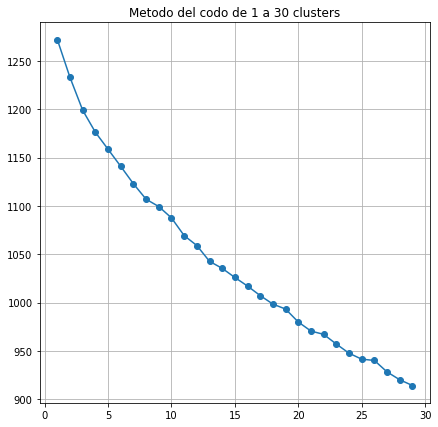

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

from sklearn.decomposition import TruncatedSVD
# Utilizamos TruncatedSVD 

new = TruncatedSVD(n_components=2).fit_transform(tfidf_matrix) # reduccion con unigramas

sse = []

clusters = list(range(1, 30)) # Veamos el metodo desde k=1 hasta k=30

for k in clusters:
    kmeans = KMeans(n_clusters=k).fit(tfidf_matrix) #Realizamos el k means
    sse.append(kmeans.inertia_) # Agregamos el SSE al arreglo

plt.figure(figsize=(7,7))
plt.plot(clusters, sse, marker="o") # Graficamos la cantidad de clusters en funcion de su SSE
plt.title("Metodo del codo de 1 a 30 clusters")
plt.grid(True)
plt.show()

Elegido el K óptimo, se procede a graficar el cluster:

In [ ]:
from sklearn.decomposition import TruncatedSVD
# Utilizamos TruncatedSVD 

new = TruncatedSVD(n_components=2).fit_transform(tfidf_matrix) # reduccion con unigramas

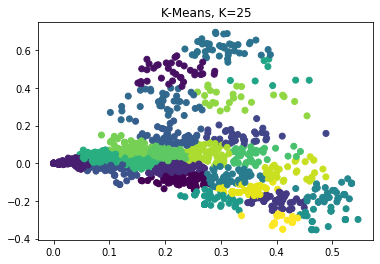

In [ ]:
# Generamos el cluster y vemos los labels de la data
kmean = KMeans(n_clusters=25).fit(new) # kmeans con Unigramas

# Graficamos el cluster par unigrasmas

plt.scatter(new[:, 0], new[:, 1], c=kmean.labels_)
plt.title("K-Means, K=25")
plt.show()

Mostramos la cantidad de elementos por cluster:

In [ ]:
# Creamos diccionarios para guardar los valores del modo (cluster: # de repeticiones)
val_kmeans = {}

for i in kmean.labels_:
    val_kmeans[i] = np.count_nonzero(kmean.labels_ == i)

print('Con reduccion de dimension: \n')
for v in val_kmeans:
    print('Cluster:', v, 'contiene: ', val_kmeans[v], " elementos")

In [ ]:
# Creamos diccionarios para guardar los valores del modo (cluster: # de repeticiones)
val_kmeans = {}

for i in kmean.labels_:
    val_kmeans[i] = np.count_nonzero(kmean.labels_ == i)

print('Con reduccion de dimension: \n')
for v in val_kmeans:
    print('Cluster:', v, 'contiene: ', val_kmeans[v], " elementos")

Con reduccion de dimension: 

Cluster: 6 contiene:  61  elementos
Cluster: 4 contiene:  151  elementos
Cluster: 14 contiene:  121  elementos
Cluster: 3 contiene:  63  elementos
Cluster: 5 contiene:  54  elementos
Cluster: 1 contiene:  118  elementos
Cluster: 0 contiene:  163  elementos
Cluster: 7 contiene:  101  elementos
Cluster: 8 contiene:  186  elementos
Cluster: 12 contiene:  58  elementos
Cluster: 13 contiene:  26  elementos
Cluster: 11 contiene:  35  elementos
Cluster: 10 contiene:  136  elementos
Cluster: 2 contiene:  43  elementos
Cluster: 9 contiene:  49  elementos


Ahora, se realiza el clustering utilizando Clustering Jerárquico Aglomerativo:

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

complete = linkage(new, method="complete")
single = linkage(new, method="single")
average = linkage(new, method="average")
ward = linkage(new, method="ward")

Se grafican los dendogramas respectivos:

In [ ]:
# Para complete
plt.figure(figsize=(20,5))
dendrogram(complete)
plt.title("Linkage: Complete")
plt.show()

In [ ]:
# Para Single
plt.figure(figsize=(20,5))
dendrogram(single)
plt.title("Linkage: Single")
plt.show()

In [ ]:
# Para Average
plt.figure(figsize=(20,5))
dendrogram(average)
plt.title("Linkage: Average")
plt.show()

In [ ]:
# Para Ward
plt.figure(figsize=(20,5))
dendrogram(ward)
plt.title("Linkage: Ward")
plt.show()

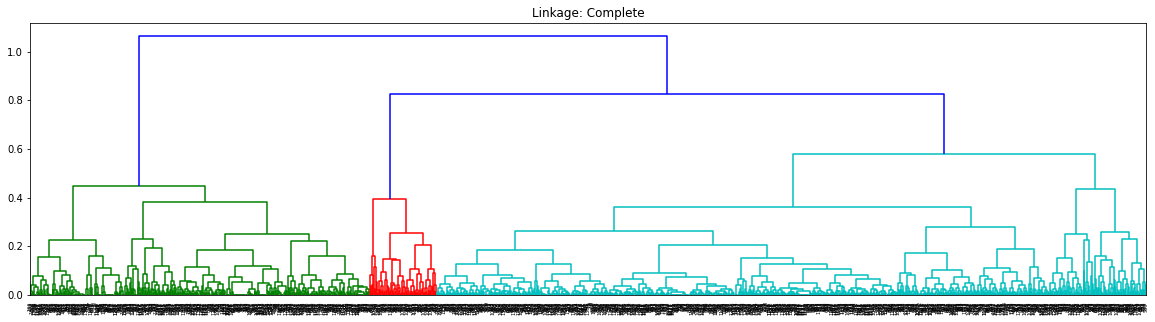

In [ ]:
# Para complete
plt.figure(figsize=(20,5))
dendrogram(complete)
plt.title("Linkage: Complete")
plt.show()

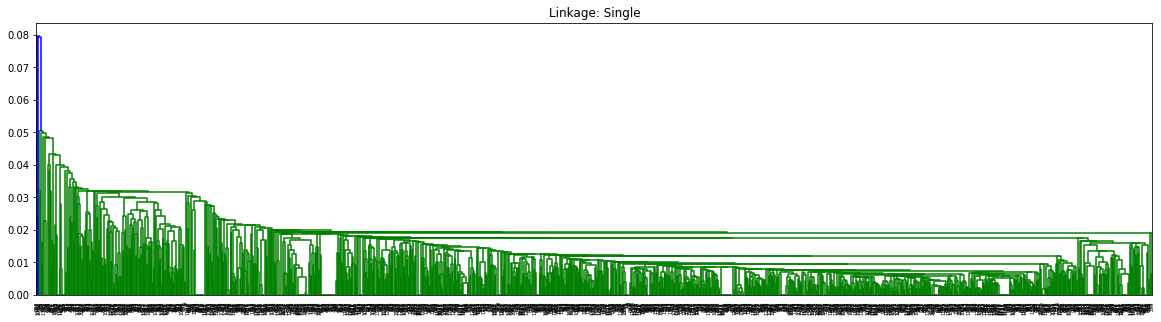

In [ ]:
# Para Single
plt.figure(figsize=(20,5))
dendrogram(single)
plt.title("Linkage: Single")
plt.show()

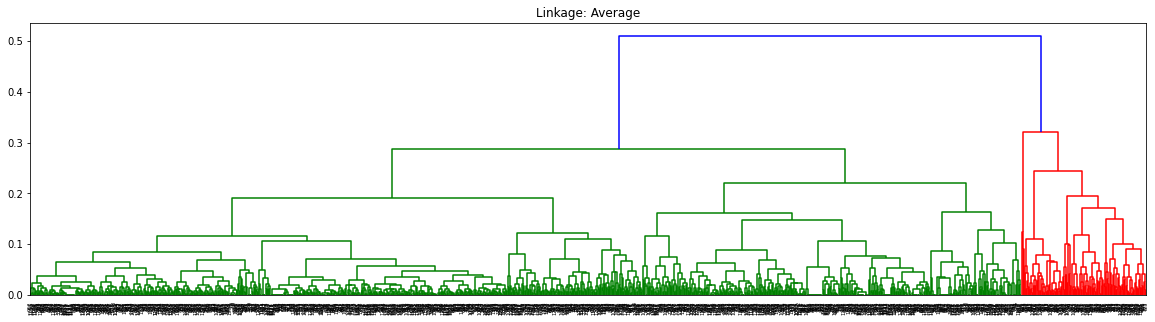

In [ ]:
# Para Average
plt.figure(figsize=(20,5))
dendrogram(average)
plt.title("Linkage: Average")
plt.show()

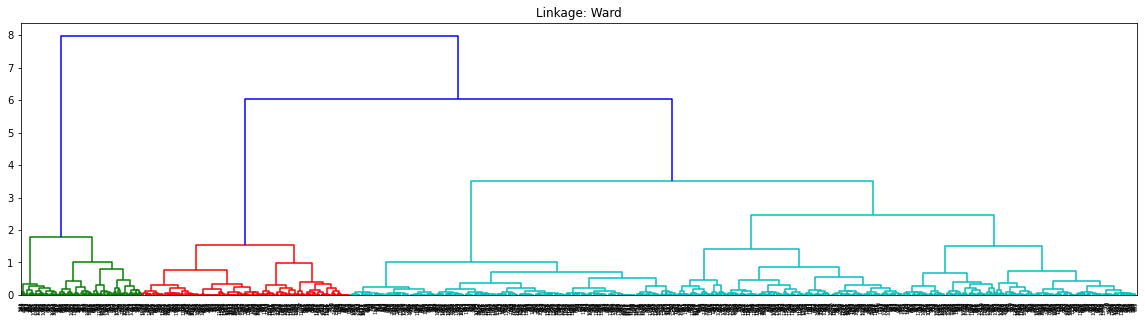

In [ ]:
# Para Ward
plt.figure(figsize=(20,5))
dendrogram(ward)
plt.title("Linkage: Ward")
plt.show()

Se cortan los dendogramas y se realiza el clustering con los métodos Ward y Complete:

In [ ]:
complete_all = AgglomerativeClustering(n_clusters=None, linkage="complete", distance_threshold=0.27).fit(new)
ward_all = AgglomerativeClustering(n_clusters=None, linkage="ward", distance_threshold=1.5).fit(new)

# Asignaciones para single
complete_all.labels_

array([4, 4, 9, ..., 3, 8, 3])

In [ ]:
ward_all.labels_

array([4, 4, 1, ..., 1, 0, 1])

In [ ]:
# Asignaciones para Complete
complete_all.labels_

Se obtienen las cantidades de clusters generados por los métodos:

In [ ]:
print('Clusters generados para "complete":' , complete_all.n_clusters_)
print('Clusters generados para "ward":' , ward_all.n_clusters_)

Se grafican los clusterings respectivos:

In [ ]:
# Para Complete
plt.figure(figsize=(7,7))
plt.scatter(new[:, 0], new[:, 1], c=complete_all.labels_)
plt.title("Complete con 10 clusters")
plt.show()

In [ ]:
# Para Ward
plt.figure(figsize=(7,7))
plt.scatter(new[:, 0], new[:, 1], c=ward_all.labels_)
plt.title("Ward con 7 clusters")
plt.show()

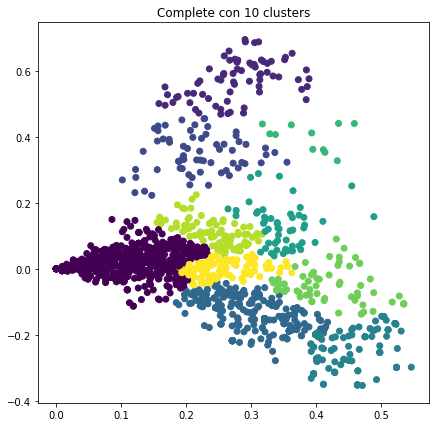

In [ ]:
# Para Complete
plt.figure(figsize=(7,7))
plt.scatter(new[:, 0], new[:, 1], c=complete_all.labels_)
plt.title("Complete con 10 clusters")
plt.show()

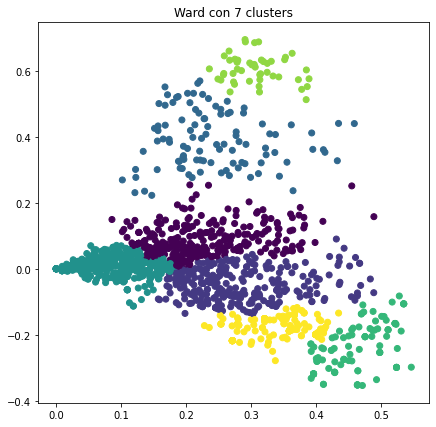

In [ ]:
# Para ward
plt.figure(figsize=(7,7))
plt.scatter(new[:, 0], new[:, 1], c=ward_all.labels_)
plt.title("Ward con 7 clusters")
plt.show()

Coeficiente de Sillhouete para la validación de los clusterings:

In [ ]:
plot_multiple(new, [kmean, dbscan])

The average silhouette_score for KMeans is : 0.375345310604483
The average silhouette_score for AgglomerativeClustering is : 0.36540886549861035
The average silhouette_score for AgglomerativeClustering is : 0.34265967953710447


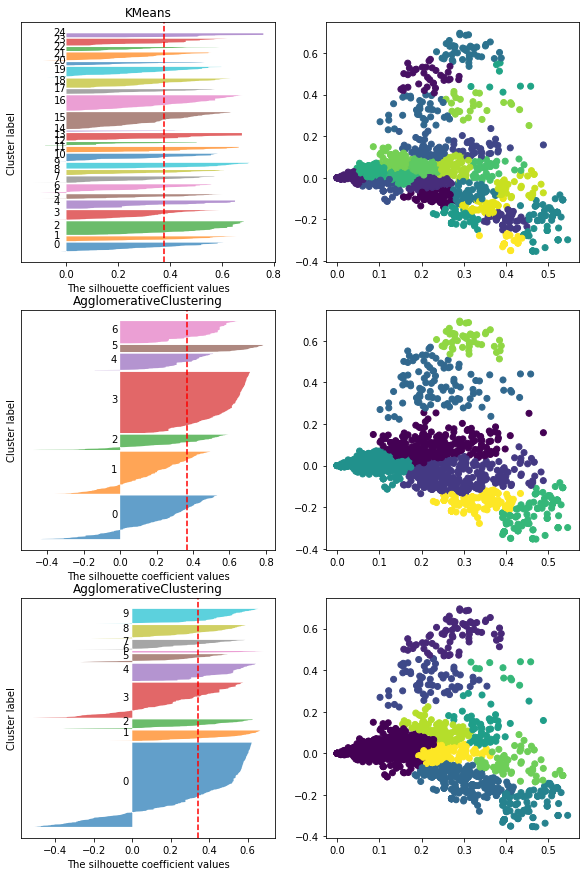

In [ ]:
plot_multiple(new, [kmean, ward_all, complete_all])

### Conclusión

Se puede ver que en los 2 métodos se ve un clustering de datos parecidos, por lo que sí habría un grupo de skills a desarrollar para poder optar a un mayor sueldo. Sin embargo, el coeficiente de Silhouette es bajo como para decir que la asignación es del todo correcta.

Para poder lograr un mejor resultado, se necesitaría un trabajo “más limpio” en el sentido de procesar correctamente los datos y limpiar bien el atributo skills, generando transacciones en base a los skills vistos y los sueldos y luego generar reglas de asociación. Otra opción también era hacer conteo de sueldos en los que aparece cada skill, pero esa opción tomaba un tiempo de ejecución demasiado grande por la dimensión de los datos y las skills.

##Pregunta 3

La Pregunta 3 fue modificada para hacer un análisis descriptivo en vez de clasificación. En esta se procederá a agregar más datos al dataset para obtener los análisis requeridos, agregar clasificadores a las ofertas para separarlas en 4 grupos. Y finalmente, se pasará a la creación de clusters para ver la similitud entre los datos.

In [ ]:
import numpy as np
import pandas as pd
#!pip install kmodes
import matplotlib.pyplot as plt

### Modificación de la pregunta planteada

¿Se pueden inferir alguna relación entre la población, la región, el PIB y el tipo de trabajo que se está ofertando?


En el dataset, agruparemos los nombres de los trabajos en categorías, por lo que se creará una nueva variable para categorizar y agrupar los trabajos, además se añadirán otros datos, que aporten características de cada localidad, para ver si hay alguna correlación con la cantidad de habitantes, ingreso per cápita, etc. Por último, nos enfocaremos en hacer clustering usando estas nuevas variables, y viendo si podemos encontrar alguna relación entre estas.

En particular, se agregó una columna para el tipo de trabajo, utilizando 4 áreas para englobar cada oferta de trabajo:
* Servicios.
* Ventas.
* Ingeniería.
* Salud.

Usando el método del codo, buscamos cuantos clusters forman nuestros datos, usando la oferta, región. Por último, se analizan los clusters obtenidos.


### Agregar nuevos datos al dataset

Se agregaron los datos de PIB, cantidad de población y las iniciales de cada región (estado) al dataset para poder realizar el análisis.

In [ ]:
best_jobs = pd.read_csv("/content/drive/MyDrive/Minería/Best_Jobs_act.csv", sep=';', engine='python', error_bad_lines=False) 
best_jobs.drop(best_jobs.iloc[:, 20:166], inplace = True, axis = 1)
best_jobs.head()

,salary,wage_type,education,crawled_at,description,title,skills,country,locality,posted_at,hora,segmento_hora,bloque_horario,region,experience,employment_type,company,str_salary,reported_salary,normalized
0,not_reported,not_reported,NaN,05-05-2021 3:18,This Dedicated truck driver position features ...,Class A CDL - Dedicated Truck Driver Lowe's,NaN,US,Scranton,01-05-2021,0:00:00,0 am,madrugada,PA,NaN,FULL_TIME,Schneider,TRUE,0,0.0
1,not_reported,not_reported,NaN,05-05-2021 3:02,What’s different about driving for Chalk Mount...,Local CDL A Truck Driver,"Protocol (Science), Maintenance",US,Godley,07-04-2021,0:01:00,0 am,madrugada,TX,At least 5 years experience.,FULL_TIME,Chalk Mountain Services of Texas,TRUE,0,0.0
2,not_reported,not_reported,NaN,05-05-2021 3:05,What’s different about driving for Chalk Mount...,CDL A Truck Driver - Home Daily!,"Protocol (Science), Maintenance",US,Sierra Blanca,07-04-2021,0:01:00,0 am,madrugada,TX,At least 5 years experience.,FULL_TIME,Chalk Mountain Services of Texas,TRUE,0,0.0
3,not_reported,not_reported,High School,05-05-2021 3:08,"Shifts: Overnight, Early Morning, Day, Evening...",Warehouse Handler (Hiring Immediately) - Earn ...,"Hardworking And Dedicated, Health Care Benefit...",US,Phoenix,04-05-2021,0:01:00,0 am,madrugada,AZ,NaN,FULL_TIME,Amazon,TRUE,0,0.0
4,not_reported,not_reported,NaN,05-05-2021 3:09,What’s different about driving for Chalk Mount...,CDL A Truck Driver - Home Daily!,"Protocol (Science), Maintenance",US,Spearman,07-04-2021,0:01:00,0 am,madrugada,TX,At least 5 years experience.,FULL_TIME,Chalk Mountain Services of Texas,TRUE,0,0.0


In [ ]:
pib_df = pd.read_csv("/content/drive/MyDrive/Minería/gpa_per_state.csv", sep=";", skiprows=[50], header=[0])
#pib_df = pib_df.iloc[:,[7,10]]
#pib_df = pib_df.set_axis(['PIB_per_capita', 'region'], axis=1)
pib_df['pib_per_capita'] = pib_df['pib_per_capita'].str.replace('$', '')
pib_df['pib_per_capita'] = pib_df['pib_per_capita'].str.replace(',', '.').astype(float)
pib_df.head()

,State,mominal_GDP,pib_per_capita,per_of_national,region,population
0,Alabama,"$229,83",46.88,1.06%,AL,4903185
1,Alaska,"$52,86",72.26,0.25%,AK,731545
2,Arizona,"$377,48",51.87,1.73%,AZ,7278717
3,Arkansas,"$131,82",43.69,0.61%,AR,3017804
4,California,"$3,189,703",80.73,14.62%,CA,39512223


In [ ]:
best_jobs = best_jobs.merge(pib_df,  left_on='region', right_on='region', suffixes=(False, False))


In [ ]:
best_jobs.head()

,salary,wage_type,education,crawled_at,description,title,skills,country,locality,posted_at,hora,segmento_hora,bloque_horario,region,experience,employment_type,company,str_salary,reported_salary,normalized,State,mominal_GDP,pib_per_capita,per_of_national,population
0,not_reported,not_reported,NaN,05-05-2021 3:18,This Dedicated truck driver position features ...,Class A CDL - Dedicated Truck Driver Lowe's,NaN,US,Scranton,01-05-2021,0:00:00,0 am,madrugada,PA,NaN,FULL_TIME,Schneider,TRUE,0,0.0,Pennsylvania,"$808,94",63.19,3.77%,12801989
1,not_reported,not_reported,NaN,05-05-2021 3:23,Truck drivers earn up to 75000 per year* and g...,Class A CDL - Local Intermodal Truck Driver 4 ...,NaN,US,Harrisburg,20-04-2021,0:04:00,0 am,madrugada,PA,NaN,FULL_TIME,Schneider,TRUE,0,0.0,Pennsylvania,"$808,94",63.19,3.77%,12801989
2,not_reported,not_reported,NaN,05-05-2021 3:13,O'Reilly is now hiring Parts Delivery drivers....,Parts Delivery,"Hardworking And Dedicated, Team-working, Profe...",US,West View,13-04-2021,0:19:00,0 am,madrugada,PA,NaN,FULL_TIME,O'Reilly Auto Parts,TRUE,0,0.0,Pennsylvania,"$808,94",63.19,3.77%,12801989
3,not_reported,not_reported,Bachelor's Degree,05-05-2021 3:19,Provide expert therapy to patients with injuri...,Physical Therapist - Travel Contract,"Recruitment, Scheduling, Physical Therapy, Inf...",US,Woodland,19-04-2021,2:15:00,2 am,madrugada,PA,NaN,FULL_TIME,Jackson Therapy Partners,TRUE,0,0.0,Pennsylvania,"$808,94",63.19,3.77%,12801989
4,not_reported,not_reported,NaN,05-05-2021 3:19,Full Stack Sr. Java Developer Position Descri...,Full Stack Sr. Java Developer,"Data/Record Logging, Git, Jenkins, JavaScript ...",US,Pittsburgh,14-04-2021,2:30:00,2 am,madrugada,PA,6 to 8 years experience.,FULL_TIME,"CGI Group, Inc.",TRUE,0,0.0,Pennsylvania,"$808,94",63.19,3.77%,12801989


### Agregar clasificadores para el tipo de oferta

Luego, para separar las ofertas en varios conjuntos, se utilizaron 4 categorías de oferta: salud, ingeniería, ventas y servicios. Esto tomado desde las categorías usadas para la pregunta 1 del proyecto.
Entonces, basándose en las palabras que se podían encontrar en el título o descripción de la oferta, esta era clasificada en alguna de las 4 opciones.

In [ ]:
#separando el dataset con los datos que nos importan para esta parte
best_jobs = best_jobs[["title", "description", "pib_per_capita", "population", "region"]]
data = best_jobs.copy()
#data = data.set_index('title')
data.dropna(subset = ["title", "description", "pib_per_capita", "population", "region"], inplace=True)
data.shape

(6934, 5)

Se agrega una columna 'job_class' que contiene la categoría de cada oferta de trabajo. Al principio todas las columnas tienen el valor 'undefined'

In [ ]:
data['job_class'] = 'undefined'
data['title'] = data['title'].str.lower()
data['description'] = data['description'].str.lower()
data.head()

,title,description,pib_per_capita,population,region,job_class
0,class a cdl - dedicated truck driver lowe's,this dedicated truck driver position features ...,63.19,12801989,PA,undefined
1,class a cdl - local intermodal truck driver 4 ...,truck drivers earn up to 75000 per year* and g...,63.19,12801989,PA,undefined
2,parts delivery,o'reilly is now hiring parts delivery drivers....,63.19,12801989,PA,undefined
3,physical therapist - travel contract,provide expert therapy to patients with injuri...,63.19,12801989,PA,undefined
4,full stack sr. java developer,full stack sr. java developer position descri...,63.19,12801989,PA,undefined


Se realiza una función 'assign_class' para revisar las palabras que contienen el título y descripción de cada oferta y clasificarlas.

In [ ]:
def assign_class(df, keywords, job_class):
  df['results'] = df['title'].str.contains('|'.join(keywords))
  df['results2'] = df['description'].str.contains('|'.join(keywords))
  df.loc[(((df['results'] == True) | (df['results2'] == True)) & (df['job_class'] == 'undefined')) , 'job_class'] = job_class
  #df.loc[((df['results'] == False) & (df['job_class'] == 'undefined')), 'job_class'] = 'undefined'
  return df

Ocupamos la función para las cuatro categorías definidas 

In [ ]:
data = assign_class(data, ['engineering', 'engineer', 'full stack', 'developer'], 'engineering')
data = assign_class(data, ['health', 'nurse', 'doctor', 'therapy', 'clinic', 'patients'], 'healthcare')
data = assign_class(data, ['sales', 'executive', 'representative', 'merchandise'], 'sales')
data = assign_class(data, ['warehouse', 'driver ', 'delivery', 'truck'], 'services')
data.head()

,title,description,pib_per_capita,population,region,job_class,results,results2
0,class a cdl - dedicated truck driver lowe's,this dedicated truck driver position features ...,63.19,12801989,PA,services,True,True
1,class a cdl - local intermodal truck driver 4 ...,truck drivers earn up to 75000 per year* and g...,63.19,12801989,PA,services,True,True
2,parts delivery,o'reilly is now hiring parts delivery drivers....,63.19,12801989,PA,services,True,True
3,physical therapist - travel contract,provide expert therapy to patients with injuri...,63.19,12801989,PA,healthcare,False,False
4,full stack sr. java developer,full stack sr. java developer position descri...,63.19,12801989,PA,engineering,False,True


Antes de seguir con los clusters, se eliminaron todas las filas que tenían 'undefined' en 'job_class' después de haber aplicado la función.

In [ ]:
data = data[data['job_class']!='undefined']
_, data['region_class'] = np.unique(data['region'], return_inverse=True)
data['job_classes']=data['job_class'].map({'services':0,'engineering':1,'healthcare':2,'sales':3})
data0 = data.drop(columns=['title','description',
                           'results', 'results2', 
                           'region', 'job_class'])
data1 = data0.drop(columns=['region_class', 'job_classes'])
data2 = data0.drop(columns=['job_classes', 'population'])
#data3 = data0.drop(columns=['region_class', 'population'])
data4 = data0.drop(columns=['job_classes', 'pib_per_capita'])
data_1 = data0[['population', 'pib_per_capita']]
data0

,pib_per_capita,population,region_class,job_classes
0,63.19,12801989,36,0
1,63.19,12801989,36,0
2,63.19,12801989,36,0
3,63.19,12801989,36,2
4,63.19,12801989,36,1
...,...,...,...,...
6928,72.26,731545,0,2
6929,72.26,731545,0,2
6930,49.86,1068778,24,3
6931,49.86,1068778,24,2


### Creación de clusters

Se procedió a hacer los clusters para las variables estudiadas. Primero estimamos la cantidad de clusters con K-Means y la regla del codo viendo el gráfico obtenido.

En el gráfico donde se relaciona población y PIB, por la regla del codo debemos utilizar 4 clusters.

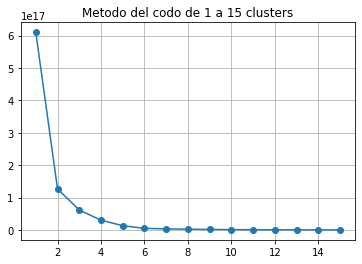

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

data1 = pd.DataFrame(data1).to_numpy()


sse = []

clusters = list(range(1, 16))
for k in clusters:
    kmeans = KMeans(n_clusters=k).fit(data1)
    sse.append(kmeans.inertia_)

plt.plot(clusters, sse, marker="o")
plt.title("Metodo del codo de 1 a 15 clusters")
plt.grid(True)
plt.show()

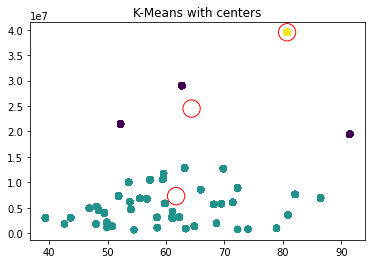

In [ ]:
# Plot para 4 clusters
random_state = 20

kmeans1 = KMeans(n_clusters=3, random_state=random_state).fit(data1)
centers1 = kmeans1.cluster_centers_

plt.scatter(data1[:, 0], data1[:, 1], c=kmeans1.labels_)
plt.scatter(centers1[:,0], centers1[:,1], s=300, facecolors='none', edgecolors='r')
plt.title("K-Means with centers")
plt.show()

En el próximo gráfico se relaciona región y el PIB, también se concluye que hay que usar 4 clusters.

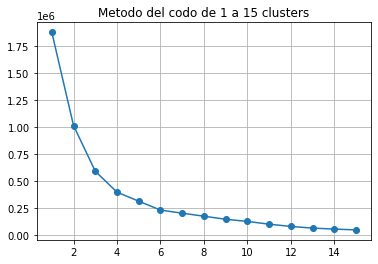

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

data2= pd.DataFrame(data2).to_numpy()


sse = []

clusters = list(range(1, 16))
for k in clusters:
    kmeans = KMeans(n_clusters=k).fit(data2)
    sse.append(kmeans.inertia_)

plt.plot(clusters, sse, marker="o")
plt.title("Metodo del codo de 1 a 15 clusters")
plt.grid(True)
plt.show()

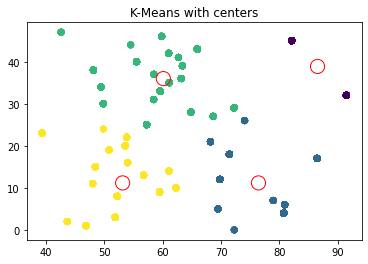

In [ ]:
random_state = 10

kmeans1 = KMeans(n_clusters=4, random_state=random_state).fit(data2)
centers1 = kmeans1.cluster_centers_

plt.scatter(data2[:, 0], data2[:, 1], c=kmeans1.labels_)
plt.scatter(centers1[:,0], centers1[:,1], s=200, facecolors='none', edgecolors='r')
plt.title("K-Means with centers")
plt.show()

En el último se relaciona la región y la población y se deben utilizar 3 clusters.

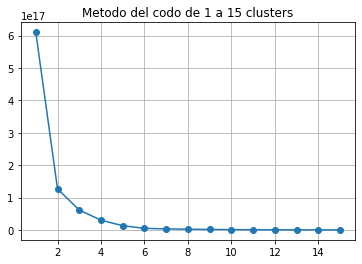

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

data4 = pd.DataFrame(data4).to_numpy()


sse = []

clusters = list(range(1, 16))
for k in clusters:
    kmeans = KMeans(n_clusters=k).fit(data4)
    sse.append(kmeans.inertia_)

plt.plot(clusters, sse, marker="o")
plt.title("Metodo del codo de 1 a 15 clusters")
plt.grid(True)
plt.show()

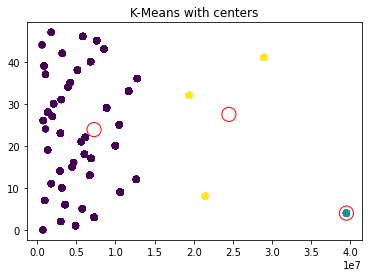

In [ ]:
random_state = 10

kmeans1 = KMeans(n_clusters=3, random_state=random_state).fit(data4)
centers1 = kmeans1.cluster_centers_

plt.scatter(data4[:, 0], data4[:, 1], c=kmeans1.labels_)
plt.scatter(centers1[:,0], centers1[:,1], s=200, facecolors='none', edgecolors='r')
plt.title("K-Means with centers")
plt.show()

###Conclusiones

La variable 'job_class' no sirvió para hacer los análisis, ya que era una variable categórica y, por lo tanto, no entregó buenos resultados. Por esta razón se tuvo que trabajar con otras variables que no tenían tanta relación.

Si bien hay algunos de los clusters que parecen seguir un patrón, como en el segundo cluster, las variables no están tan relacionadas como para sacar conclusiones a partir de estos.

Una de las ideas que se tiene es que podría haberse usado reglas de asociación en vez de clusterización para obtener mejores resultados, ya que tanto el título como la descripción de una oferta de trabajo están conformados por palabras que se repiten en muchas de las publicaciones.

## Trabajo relizado

- Ajustes Pregunta 1: Gabriela Mora
- Pregunta 2: Maximiliano Jorquera, Bastián Pezoa
- Pregunta 3: Loreto Palma, Catalina Rojas